# ENERGY DATA ENGINEERING 1 SEMESTER PROJECT 23/24

name: Julius Reiner, Saurav Bhowmick, Mohammad AL Atailat

date: 23.01.2024

# Task 1

In [1]:
# Imports for the Code
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Exploratory data analyis for the year 2022
1. Calculate the share of renewables
2. Aggregate data on a daily, weekly and monthly and yearly basis
3. Plot the electricity mix for 2022 (share per energy carrier)
4. Plot a sorted generation duration curve 
    ▪ compare Wikipedia: “Load duration Curve”
5. Plot the time-series for energy generation showing all energy carrier
6. Conduct exploratory data analysis on:
    1. Day-Ahead Price
    2. Share of renewables 
7. Analyze the hypothesis, that the day-ahead price correlates with the share of renewables by using appropriate statistical methods

Procedure of task 1: 
- Gather all data into one big dataframe (aswell as dictionary)
- Analyze the task with the dataframe
- Create a feature to quickly plot the dataframe for discussions and presentation

# Task 1 Aggregate data with the dataframe and ad renewable, fossil, daily, weekly and monthly columns

In [2]:
# Read the CSV file with header in the first row:
df = pd.read_csv("F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202201010000-202301010000.csv", header=0)

# Create the categories for the columns to seperate fossil and renewables:
renewable_categories = ['Biomass  - Actual Aggregated [MW]', 'Geothermal  - Actual Aggregated [MW]',
                         'Hydro Pumped Storage  - Actual Aggregated [MW]',
                         'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
                         'Hydro Water Reservoir  - Actual Aggregated [MW]',
                         'Marine  - Actual Aggregated [MW]', 'Other renewable  - Actual Aggregated [MW]',
                         'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
                         'Wind Offshore  - Actual Aggregated [MW]', 'Wind Onshore  - Actual Aggregated [MW]']

fossil_categories = ['Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
                      'Fossil Coal-derived gas  - Actual Aggregated [MW]',
                      'Fossil Gas  - Actual Aggregated [MW]',
                      'Fossil Hard coal  - Actual Aggregated [MW]',
                      'Fossil Oil  - Actual Aggregated [MW]',
                      'Fossil Oil shale  - Actual Aggregated [MW]',
                      'Fossil Peat  - Actual Aggregated [MW]',
                      'Nuclear  - Actual Aggregated [MW]',
                      'Other  - Actual Aggregated [MW]']

# Function to clean cells without numbers to only calculate the actual MW
def clean_and_sum(column):
    return pd.to_numeric(column, errors='coerce').sum()

# Categorize column names and calculate the hourly sums and ad it into the Dataframe:
df['Renewable'] = df[renewable_categories].apply(clean_and_sum, axis=1)
df['Fossil'] = df[fossil_categories].apply(clean_and_sum, axis=1)

# Total categories for the pie chart for the whole Year.
total_renewable = df['Renewable'].sum()
total_fossil = df['Fossil'].sum()


###########
# Preperation for the PieGraphs:
# Extract column names from the first row of the DataFrame (ignore the first two columns and the last two columns)
column_names = df.columns[2:-2]

# Convert columns to numeric values and sum them
total_by_energy_form = df[column_names].apply(pd.to_numeric, errors='coerce').sum()

# Sort the categories in descending order by the total sum
sorted_column_names = total_by_energy_form.sort_values(ascending=False).index
###########

###########
# Preperation for Task 1.2 by aggregating the column weekly daily and monthly
#Convert the MTU to a daytimeobject for calculations 
df['MTU'] = pd.to_datetime(df['MTU'].str.extract(r'(\d{2}\.\d{2}\.\d{4} \d{2}:\d{2})')[0], format='%d.%m.%Y %H:%M')

# Create columns for day, week, month, and year
df['Day'] = df['MTU'].dt.day
df['Week'] = df['MTU'].dt.isocalendar().week
df['Month'] = df['MTU'].dt.month
df['Year'] = df['MTU'].dt.year

# Split DataFrame by months
yearly_data = {month: df[df['Month'] == month] for month in range(1, 13)}

# Split DataFrame by weeks
weekly_data = {week: df[df['Week'] == week] for week in df['Week'].unique()}

# Split DataFrame by days
daily_data = {}
for day, month in df[['Day', 'Month']].drop_duplicates().itertuples(index=False):
    daily_data[(day, month)] = df[(df['Day'] == day) & (df['Month'] == month)]

# adding it in a overall dictionary
all_data = {
    'monthly': yearly_data,
    'weekly': weekly_data,
    'daily': daily_data
}
df.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Renewable,Fossil,Day,Week,Month,Year
0,BZN|PL,2022-01-01 00:00:00,223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,n/e,...,0.0,n/e,n/e,4256.0,4657.0,9539.0,1,52,1,2022
1,BZN|PL,2022-01-01 01:00:00,221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,n/e,...,0.0,n/e,n/e,4244.0,4641.0,9447.0,1,52,1,2022
2,BZN|PL,2022-01-01 02:00:00,221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,n/e,...,0.0,n/e,n/e,4071.0,4491.0,9493.0,1,52,1,2022
3,BZN|PL,2022-01-01 03:00:00,223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,n/e,...,0.0,n/e,n/e,3997.0,4436.0,9601.0,1,52,1,2022
4,BZN|PL,2022-01-01 04:00:00,225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,n/e,...,0.0,n/e,n/e,4105.0,4568.0,9378.0,1,52,1,2022


# Task 1.1 Calculate the share of renewables

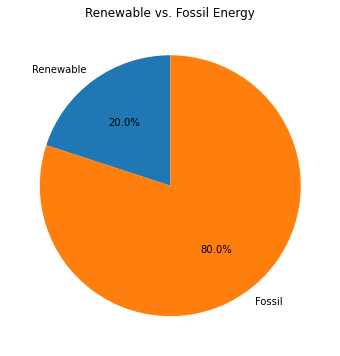

In [3]:
# Pie chart for renewable and fossil energy
plt.figure(figsize=(6, 6))
plt.pie([total_renewable, total_fossil], labels=['Renewable', 'Fossil'], autopct='%1.1f%%', startangle=90)
plt.title('Renewable vs. Fossil Energy')
plt.show()

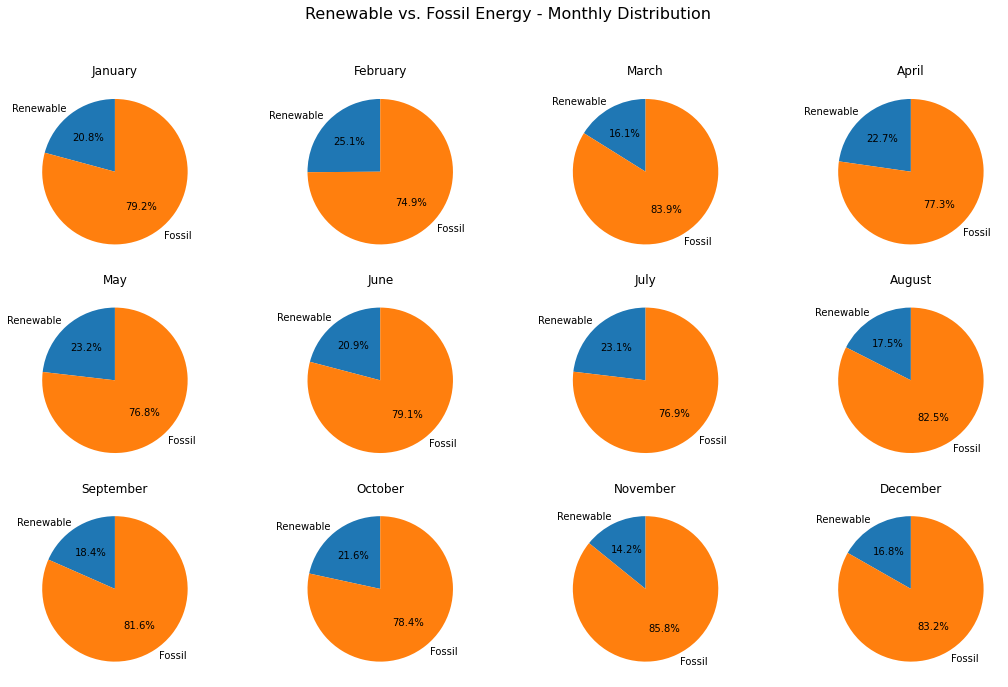

In [4]:
# Using the Dictionary we Can now create daily weekly and Monthly plots
# Create a parent Figure
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Renewable vs. Fossil Energy - Monthly Distribution', fontsize=16)

# Pie chart for renewable and fossil energy for each month
for idx, (month, data) in enumerate(all_data['monthly'].items()):
    total_renewable_month = data['Renewable'].sum()
    total_fossil_month = data['Fossil'].sum()

    row, col = divmod(idx, 4)
    axs[row, col].pie([total_renewable_month, total_fossil_month], labels=['Renewable', 'Fossil'], autopct='%1.1f%%', startangle=90)
    # Set the Month name 
    axs[row, col].set_title(calendar.month_name[month])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Task 1.3 Plot the electricity mix for 2022 (share per energy carrier)

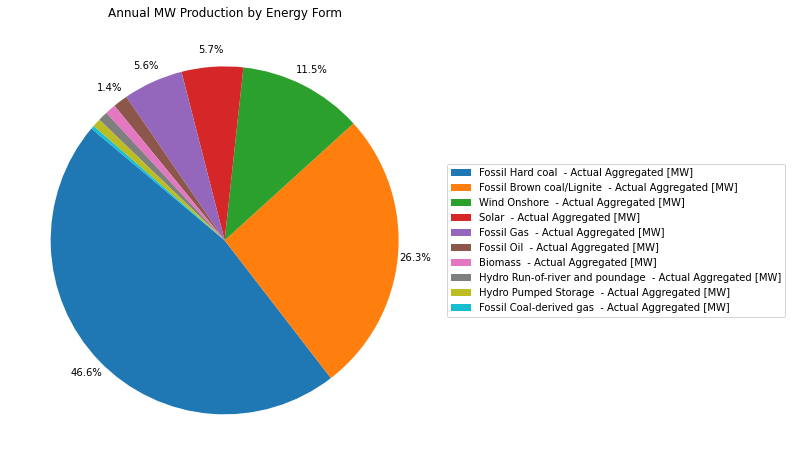

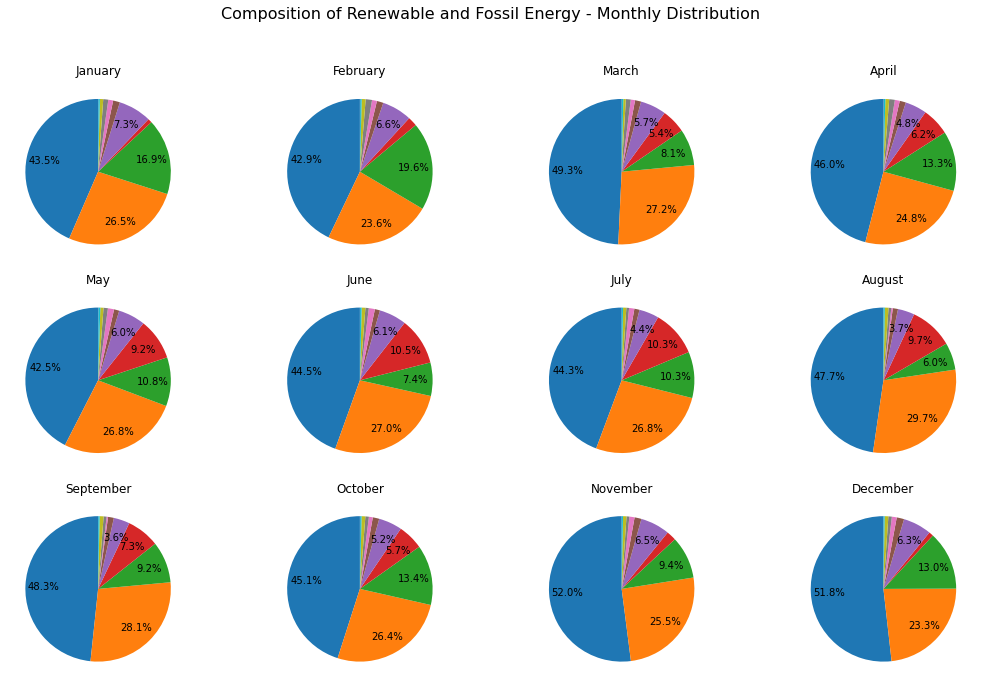

In [5]:
# Pie chart for annual MW production by energy form
threshold_percentage = 0.1
columns_with_significant_contribution = [column for column in sorted_column_names if (total_by_energy_form[column] / total_by_energy_form.sum()) * 100 >= threshold_percentage]

plt.figure(figsize=(8, 8))
plt.pie(total_by_energy_form[columns_with_significant_contribution], labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=140, pctdistance=1.1)
plt.title('Annual MW Production by Energy Form')

# Add a legend
plt.legend(labels=columns_with_significant_contribution, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Create a parent Figure
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Composition of Renewable and Fossil Energy - Monthly Distribution', fontsize=16)

# Pie chart for each energy source for each month
for idx, (month, data) in enumerate(all_data['monthly'].items()):
    # Extract column names of energy sources (ignore the first two columns)
    energy_sources = data.columns[2:]
    
    # Clean cells without numbers and replace them with NaN
    data = data.copy()
    data.loc[:, energy_sources] = data.loc[:, energy_sources].apply(pd.to_numeric, errors='coerce')
    
    # Calculate the sum of energy production for each energy source in the current month
    total_by_source = data[energy_sources].sum()
    
    # Sort the categories in descending order by the total sum (similar to the yearly chart)
    sorted_energy_sources = total_by_source.loc[sorted_column_names].index
    
    row, col = divmod(idx, 4)
    axs[row, col].pie(total_by_source[sorted_energy_sources], labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 3 else '', startangle=90, pctdistance=0.75)
    # Set the Month name 
    axs[row, col].set_title(calendar.month_name[month])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Task 1.4 Plot a sorted generation duration curve 
▪ compare “Load duration Curve”

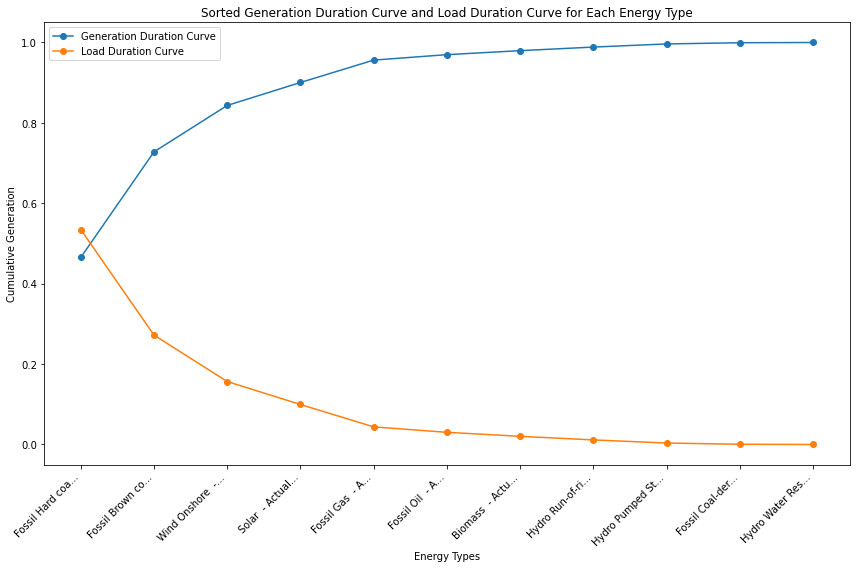

In [6]:
# New columns because of the new Coulumns in the Dataframe and Clean them (-4 = with fossil and Renwable total, else -6)
energy_columns = df.columns[2:-6] 
df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Ignore the columns like it is 0
non_zero_columns = df[energy_columns].columns[(df[energy_columns] != 0).any()]

# Sort the dataframe
sorted_df = df[non_zero_columns].sum().sort_values(ascending=False)

# Erzeugungsdauerkurve erstellen
generation_duration_curve = sorted_df.cumsum() / sorted_df.sum()

# Load Duration Curve
load_duration_curve = 1 - generation_duration_curve

# Cut the names so it can be read on the X-Axes (with chatgpt done)
short_column_names = [col[:15] + '...' if len(col) > 15 else col for col in sorted_df.index]

# Ploting
plt.figure(figsize=(12, 8))

# Generation duration curve
plt.plot(short_column_names, generation_duration_curve, label='Generation Duration Curve', marker='o')

# Load Duration Curve plotten
plt.plot(short_column_names, load_duration_curve, label='Load Duration Curve', marker='o')

# plot config
plt.title('Sorted Generation Duration Curve and Load Duration Curve for Each Energy Type')
plt.xlabel('Energy Types')
plt.ylabel('Cumulative Generation')
plt.xticks(rotation=45, ha='right')  # Rotiere x-Achsenbeschriftungen für bessere Lesbarkeit
plt.legend()
plt.tight_layout()
plt.show()

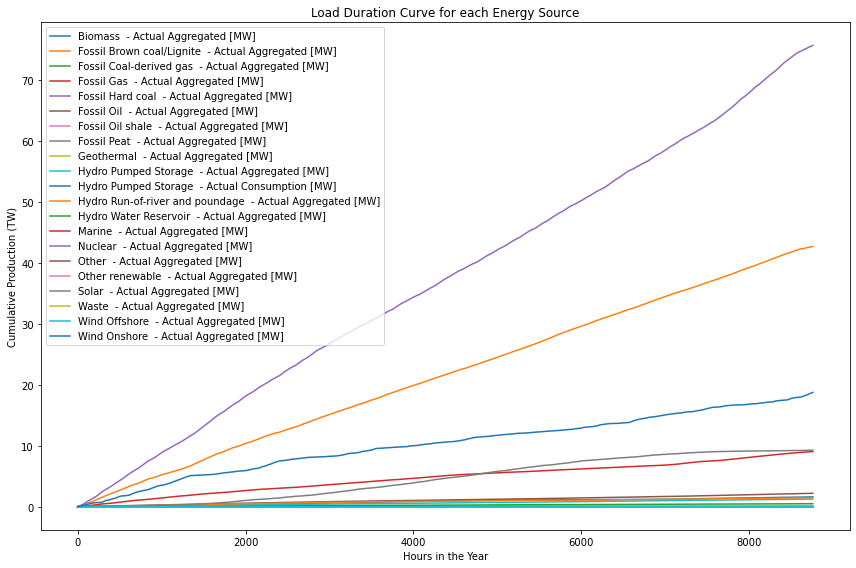

In [7]:
# Loadduaration curve for each Source
energy_columns = df.columns[2:-6] 
ldc_by_source = df[energy_columns].cumsum()

# Plot 
plt.figure(figsize=(12, 8))

# LDC for each source:
for source in ldc_by_source.columns:
    plt.plot(ldc_by_source.index, ldc_by_source[source]/1000000, label=source)

plt.title('Load Duration Curve for each Energy Source')
plt.xlabel('Hours in the Year')
plt.ylabel('Cumulative Production (TW)')
plt.legend()
plt.tight_layout()
plt.show()


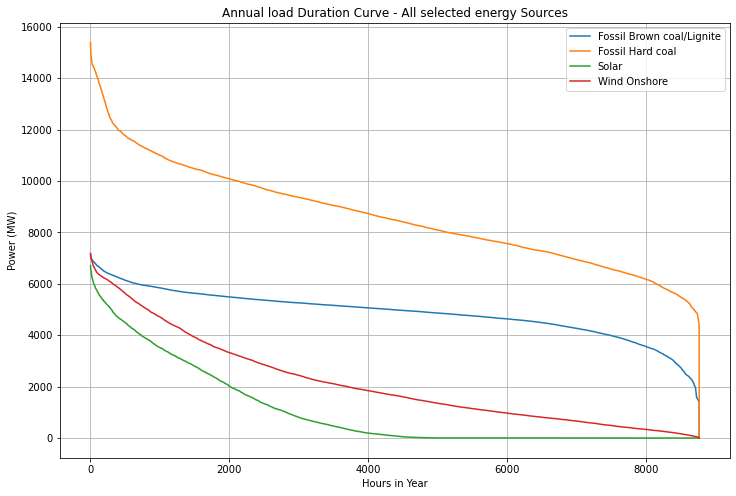

In [8]:
# Add an additional column for hours in the year
df['Hours in Year'] = range(1, len(df) + 1)

# Relevant columns for energy sources
energy_columns = [
    #'Biomass  - Actual Aggregated [MW]',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
    #'Fossil Coal-derived gas  - Actual Aggregated [MW]',
    #'Fossil Gas  - Actual Aggregated [MW]',
    'Fossil Hard coal  - Actual Aggregated [MW]',
    #'Fossil Oil  - Actual Aggregated [MW]',
    #'Fossil Oil shale  - Actual Aggregated [MW]',
    #'Fossil Peat  - Actual Aggregated [MW]',
    #'Geothermal  - Actual Aggregated [MW]',
    #'Hydro Pumped Storage  - Actual Aggregated [MW]',
    #'Hydro Pumped Storage  - Actual Consumption [MW]',
    #'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
    #'Hydro Water Reservoir  - Actual Aggregated [MW]',
    #'Marine  - Actual Aggregated [MW]',
    #'Nuclear  - Actual Aggregated [MW]',
    #'Other  - Actual Aggregated [MW]',
    #'Other renewable  - Actual Aggregated [MW]',
    'Solar  - Actual Aggregated [MW]',
    #'Waste  - Actual Aggregated [MW]',
    #'Wind Offshore  - Actual Aggregated [MW]',
    'Wind Onshore  - Actual Aggregated [MW]'
    #'Renewable',
    #'Fossil',
    #'Renewable Share (%)',
    #'Day-ahead Price [EUR/MWh]'
]

# Create an empty DataFrame for sorted values
df_dauerlinie = pd.DataFrame({'Hours in Year': range(1, len(df) + 1)})

# Iterate through each energy source and add it to the DataFrame
for column in energy_columns:
    sorted_values = sorted(df[column], reverse=True)
    df_dauerlinie[column.split('  - ')[0]] = sorted_values

# Create the annual duration curve for all energy sources
for column in df_dauerlinie.columns[1:]:
    plt.plot(df_dauerlinie['Hours in Year'], df_dauerlinie[column], label=column)

# Axes labels
plt.xlabel('Hours in Year')
plt.ylabel('Power (MW)')
plt.title('Annual load Duration Curve - All selected energy Sources')

# Show legend
plt.legend()
plt.grid(True)
plt.gcf().set_size_inches(12, 8)
plt.show()

# Task 1.1 Calculation for renewable Share in %
Task 1.6+7 preperation for Step 6 load in the new Dataframes for the Task 1.6+7

In [9]:
# Load the CSV files into DataFrames
total_load_df = pd.read_csv("F:\RED\Energy Data Engineering\Excel files\Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")
day_ahead_prices_df = pd.read_csv("F:\RED\Energy Data Engineering\Excel files\Day-ahead Prices_202201010000-202301010000.csv")

# Insert the Important columns in the Dataframe df
df.insert(2, 'Day-ahead Total Load Forecast [MW] - BZN|PL', total_load_df['Day-ahead Total Load Forecast [MW] - BZN|PL'])
df.insert(3, 'Actual Total Load [MW] - BZN|PL', total_load_df['Actual Total Load [MW] - BZN|PL'])
df.insert(4, 'Day-ahead Price [EUR/MWh]', day_ahead_prices_df['Day-ahead Price [EUR/MWh]'])

#%%Analysis of Renewables:
df['Renewable Share (%)'] = (df['Renewable'] / (df['Renewable']+df['Fossil'])) * 100

df.head()

,Area,MTU,Day-ahead Total Load Forecast [MW] - BZN|PL,Actual Total Load [MW] - BZN|PL,Day-ahead Price [EUR/MWh],Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],...,Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Renewable,Fossil,Day,Week,Month,Year,Hours in Year,Renewable Share (%)
0,BZN|PL,2022-01-01 00:00:00,15450.0,14911.0,59.03,223.0,2514.0,65.0,994.0,5686.0,...,0.0,4256.0,4657.0,9539.0,1,52,1,2022,1,32.805015
1,BZN|PL,2022-01-01 01:00:00,14750.0,14438.0,49.37,221.0,2422.0,64.0,996.0,5685.0,...,0.0,4244.0,4641.0,9447.0,1,52,1,2022,2,32.942930
2,BZN|PL,2022-01-01 02:00:00,14100.0,13935.0,43.22,221.0,2466.0,64.0,1003.0,5683.0,...,0.0,4071.0,4491.0,9493.0,1,52,1,2022,3,32.115275
3,BZN|PL,2022-01-01 03:00:00,13700.0,13579.0,45.46,223.0,2560.0,65.0,996.0,5704.0,...,0.0,3997.0,4436.0,9601.0,1,52,1,2022,4,31.602194
4,BZN|PL,2022-01-01 04:00:00,13450.0,13397.0,37.67,225.0,2420.0,65.0,996.0,5621.0,...,0.0,4105.0,4568.0,9378.0,1,52,1,2022,5,32.754912


# Task 1.6 Conduct exploratory data analysis on the Share of renewables

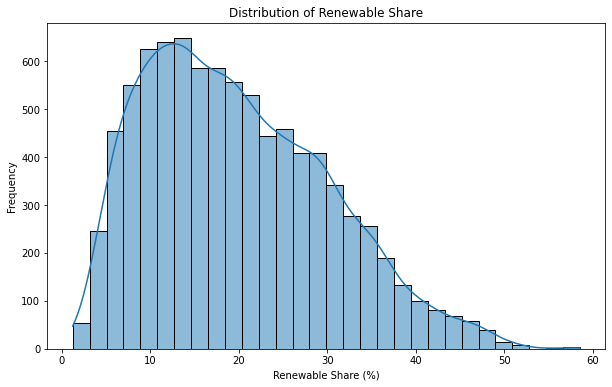

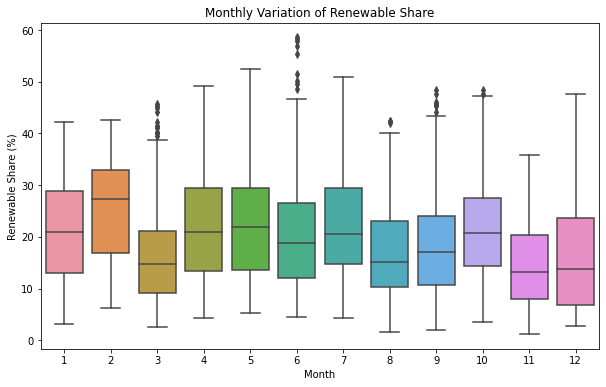

In [10]:
# Histogram of Renewable share
plt.figure(figsize=(10, 6))
sns.histplot(df['Renewable Share (%)'], bins=30, kde=True)
plt.title('Distribution of Renewable Share')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Frequency')
plt.show()
# Boxplot of Renewable share (Visual with chatgpt use and sns)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Month'], y=df['Renewable Share (%)'])
plt.title('Monthly Variation of Renewable Share')
plt.xlabel('Month')
plt.ylabel('Renewable Share (%)')
plt.show()

# Task 1.5 Timeseries 

Feature for discussion and Plots: Uncomment the energiescource and the day the week and the month that should be plottet:
With this feature the Plots for following Tasks can be done:

Task 1.2 All Plots are done for the day, week, month and year you select.

Task 1.4 Uncommend all the sources you want in the plot eather combined or single plots for Timeseries

Task 1.7 Uncommend the Day Ahead vs renewable share % for different months to see the impact in summer vs Winter

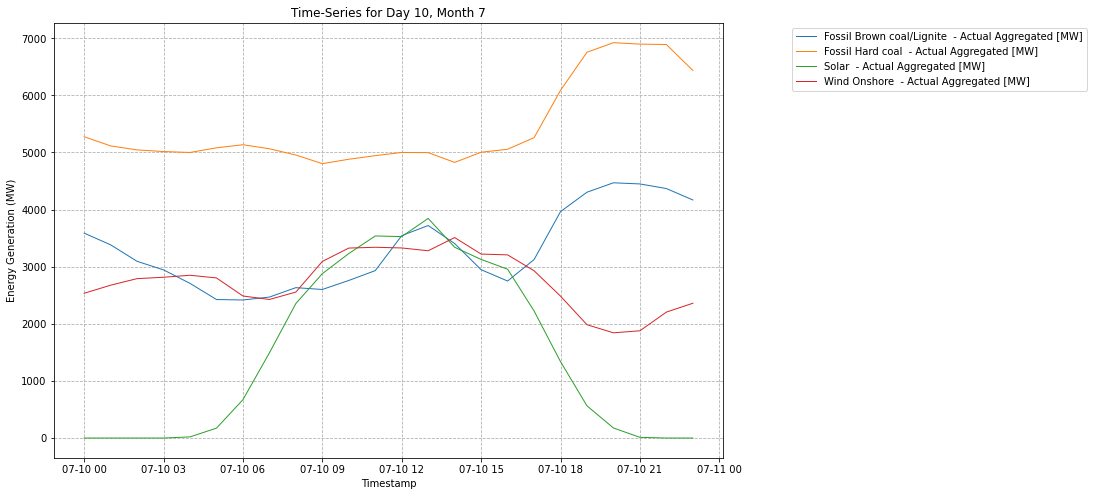

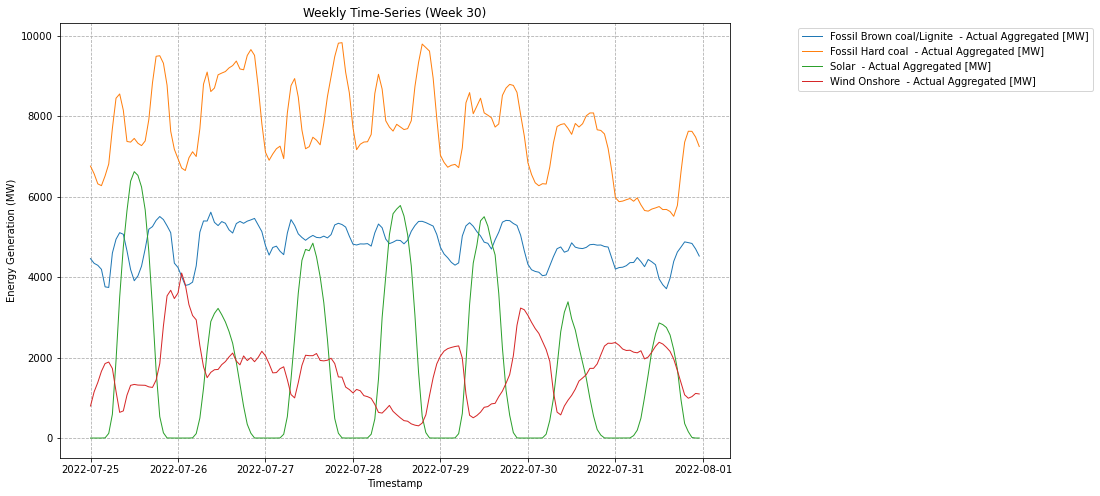

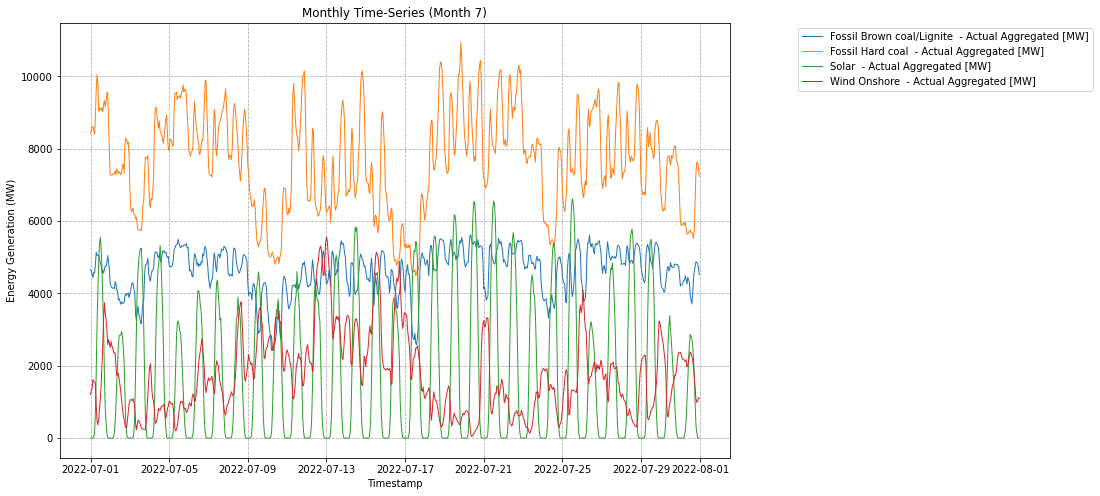

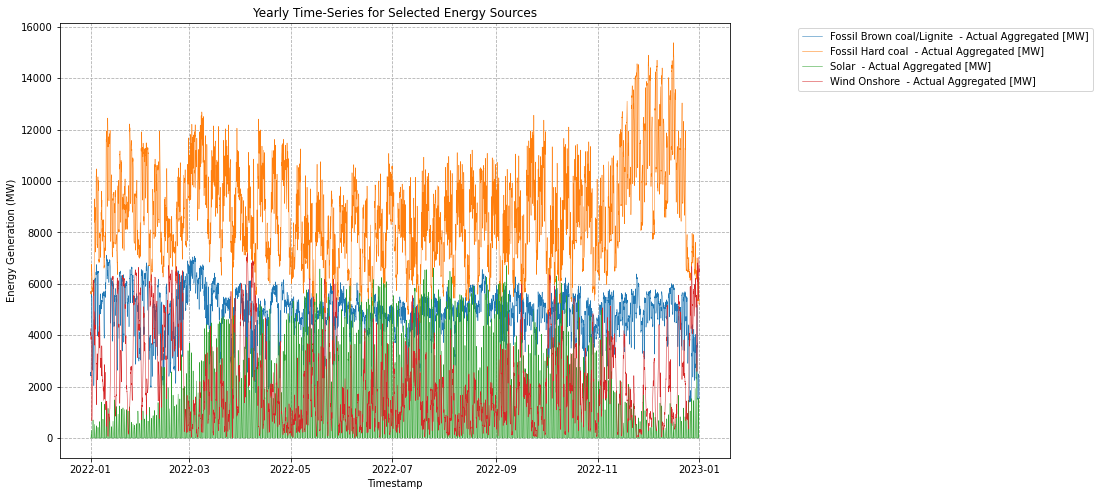

In [11]:
############################################################################################
# Define the list of energy sources to plot 
selected_energy_sources = [
    #'Biomass  - Actual Aggregated [MW]',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
    #'Fossil Coal-derived gas  - Actual Aggregated [MW]',
    #'Fossil Gas  - Actual Aggregated [MW]',
    'Fossil Hard coal  - Actual Aggregated [MW]',
    #'Fossil Oil  - Actual Aggregated [MW]',
    #'Fossil Oil shale  - Actual Aggregated [MW]',
    #'Fossil Peat  - Actual Aggregated [MW]',
    #'Geothermal  - Actual Aggregated [MW]',
    #'Hydro Pumped Storage  - Actual Aggregated [MW]',
    #'Hydro Pumped Storage  - Actual Consumption [MW]',
    #'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
    #'Hydro Water Reservoir  - Actual Aggregated [MW]',
    #'Marine  - Actual Aggregated [MW]',
    #'Nuclear  - Actual Aggregated [MW]',
    #'Other  - Actual Aggregated [MW]',
    #'Other renewable  - Actual Aggregated [MW]',
    'Solar  - Actual Aggregated [MW]',
    #'Waste  - Actual Aggregated [MW]',
    #'Wind Offshore  - Actual Aggregated [MW]',
    'Wind Onshore  - Actual Aggregated [MW]'
    #'Renewable',
    #'Fossil',
    #'Renewable Share (%)',
    #'Day-ahead Price [EUR/MWh]'
]

# select specific day and month and plot config (recommendation for Timeseries from Prof. Pafferrott, good for discussions and presentations)
selected_day = 10  # Choose the day
selected_month = 7  # choose the month (only for the day plot)
selected_week_data = df[df['Week'] == 30]  # Choose the week of the year for Weekplots
selected_month_data = df[df['Month'] == 7]  # choose the Month for month plots
combined_plot=True # Combined true means all lines in one plot. combined False means all lines in seperet plots.

#############################################################################################

# Daily selected date for each month
selected_day_data = df[(df['MTU'].dt.day == selected_day) & (df['MTU'].dt.month == selected_month)]
# Option: Tägliche Plots (alle Energiequellen)
if combined_plot==True:
    plt.figure(figsize=(12, 8))
    
    for energy_source in selected_energy_sources:
        
        # Plot all Energysources in one Plot
        plt.plot(selected_day_data['MTU'], selected_day_data[energy_source], label=energy_source, linewidth=1)
    
    # extract the month out of the selected month
    selected_month = selected_day_data['MTU'].iloc[0].month
    
    plt.title(f'Time-Series for Day {selected_day_data["MTU"].iloc[0].day}, Month {selected_month}')
    plt.xlabel('Timestamp')
    plt.ylabel('Energy Generation (MW)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
    plt.grid(True, linestyle='--', alpha=1)
    plt.show()

    # Weekly Plots
    plt.figure(figsize=(12, 8))
    
    for energy_source in selected_energy_sources:
        
        # All plots in one
        plt.plot(selected_week_data['MTU'], selected_week_data[energy_source], label=energy_source, linewidth=1)
    
    plt.title(f'Weekly Time-Series (Week {selected_week_data["Week"].iloc[0]})')
    plt.xlabel('Timestamp')
    plt.ylabel('Energy Generation (MW)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
    plt.grid(True, linestyle='--', alpha=1)
    plt.show()

    # Monthly Plots
    plt.figure(figsize=(12, 8))
    
    for energy_source in selected_energy_sources:
        
        # All plots in one figure
        plt.plot(selected_month_data['MTU'], selected_month_data[energy_source], label=energy_source, linewidth=1)
    
    plt.title(f'Monthly Time-Series (Month {selected_month_data["Month"].iloc[0]})')
    plt.xlabel('Timestamp')
    plt.ylabel('Energy Generation (MW)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
    plt.grid(True, linestyle='--', alpha=1)
    plt.show()
    
    # yearly plots of the selected
    plt.figure(figsize=(12, 8))
    
    # All in one figure
    for energy_source in selected_energy_sources:
        plt.plot(df['MTU'], df[energy_source], label=energy_source, linewidth=0.5)
    
    plt.title('Yearly Time-Series for Selected Energy Sources')
    plt.xlabel('Timestamp')
    plt.ylabel('Energy Generation (MW)')
    
    # Legende neben den Graphen (rechts oben)
    plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
    
    plt.grid(True, linestyle='--', alpha=1)
    plt.show()
    
else:
    # Daily Plots (jede Energiequelle separat)
    for energy_source in selected_energy_sources:
        plt.figure(figsize=(12, 8))
        
        # Plot jede Energiequelle separat
        plt.plot(selected_day_data['MTU'], selected_day_data[energy_source], label=energy_source, linewidth=0.5)
        
        # Extrahiere den Monat aus dem ausgewählten Datum
        selected_month = selected_day_data['MTU'].iloc[0].month
        
        plt.title(f'{energy_source} - Time-Series for Day {selected_day_data["MTU"].iloc[0].day}, Month {selected_month}')
        plt.xlabel('Timestamp')
        plt.ylabel('Energy Generation (MW)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=1)
        plt.show()

    # Weekly Plots (jede Energiequelle separat)
    for energy_source in selected_energy_sources:
        plt.figure(figsize=(12, 8))
        
        # Plot jede Energiequelle separat
        plt.plot(selected_week_data['MTU'], selected_week_data[energy_source], label=energy_source, linewidth=0.5)
        
        plt.title(f'{energy_source} - Weekly Time-Series (Week {selected_week_data["Week"].iloc[0]})')
        plt.xlabel('Timestamp')
        plt.ylabel('Energy Generation (MW)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=1)
        plt.show()

    # Monthly Plots (jede Energiequelle separat)
    for energy_source in selected_energy_sources:
        plt.figure(figsize=(12, 8))
        
        # Plot jede Energiequelle separat
        plt.plot(selected_month_data['MTU'], selected_month_data[energy_source], label=energy_source, linewidth=0.5)
        
        plt.title(f'{energy_source} - Monthly Time-Series (Month {selected_month_data["Month"].iloc[0]})')
        plt.xlabel('Timestamp')
        plt.ylabel('Energy Generation (MW)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=1)
        plt.show()
        
    # Yearly Plots (jede Energiequelle separat)
    for energy_source in selected_energy_sources:
        plt.figure(figsize=(12, 8))
        
        # Plot für jede ausgewählte Energiequelle separat
        plt.plot(df['MTU'], df[energy_source], label=energy_source, linewidth=0.5)
    
        plt.title(f'{energy_source} - Yearly Time-Series')
        plt.xlabel('Timestamp')
        plt.ylabel('Energy Generation (MW)')
        
        # Legende neben den Graphen (rechts oben)
        plt.legend()
        
        plt.grid(True, linestyle='--', alpha=1)
        plt.show()

# Task 1.6 Analysis of Day Ahead: 

In [12]:
day_ahead_prices = df['Day-ahead Price [EUR/MWh]']

# Descriptive statistics
print(day_ahead_prices.describe())

count    8760.000000
mean      166.719666
std        79.552769
min        16.330000
25%       113.370000
50%       148.725000
75%       200.212500
max       771.000000
Name: Day-ahead Price [EUR/MWh], dtype: float64


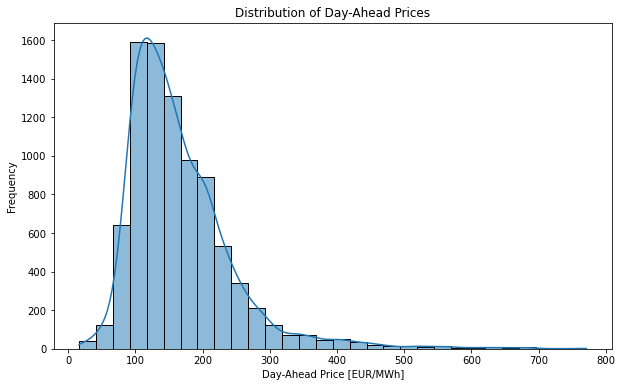

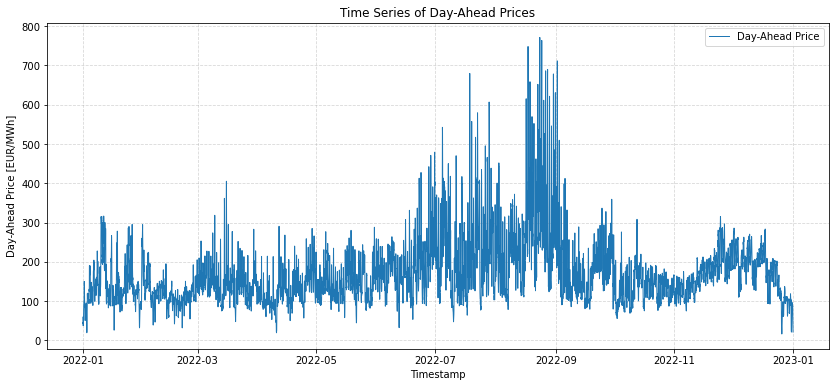

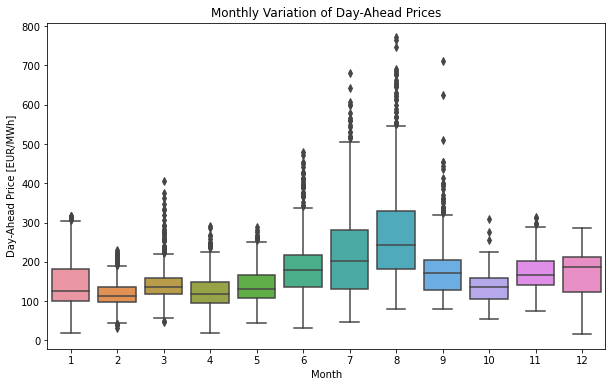

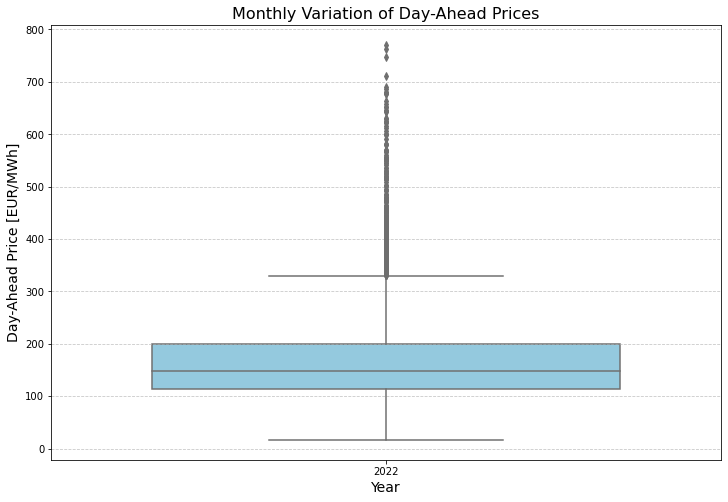

In [13]:
# Plotting for the analysis: 
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(day_ahead_prices, bins=30, kde=True)
plt.title('Distribution of Day-Ahead Prices')
plt.xlabel('Day-Ahead Price [EUR/MWh]')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot
plt.figure(figsize=(14, 6))
plt.plot(df['MTU'], day_ahead_prices, label='Day-Ahead Price', linewidth=1)
plt.title('Time Series of Day-Ahead Prices')
plt.xlabel('Timestamp')
plt.ylabel('Day-Ahead Price [EUR/MWh]')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Month'], y=day_ahead_prices)
plt.title('Monthly Variation of Day-Ahead Prices')
plt.xlabel('Month')
plt.ylabel('Day-Ahead Price [EUR/MWh]')
plt.show()

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Year'], y=day_ahead_prices, color='skyblue', width=0.7, fliersize=5)
plt.title('Monthly Variation of Day-Ahead Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Day-Ahead Price [EUR/MWh]', fontsize=14)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task 1.7 Analyse the hypothesis day ahead and renewable share

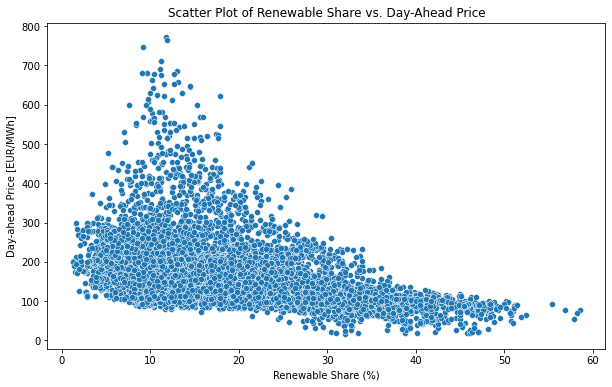

Pearson Correlation Coefficient: -0.5016360729553421
P-value: 0.0
The correlation is statistically significant.
There is a negative correlation between Renewable Share and Day-Ahead Price.


In [14]:
# Select relevant columns for analysis
columns_for_analysis = ['Day-ahead Price [EUR/MWh]', 'Renewable Share (%)']

# Create a new DataFrame with selected columns
analysis_df = df[columns_for_analysis]

# Drop rows with missing values
analysis_df = analysis_df.dropna().copy()

# Scatter plot to visualize the relationship (cheatsheet)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Renewable Share (%)', y='Day-ahead Price [EUR/MWh]', data=analysis_df)
plt.title('Scatter Plot of Renewable Share vs. Day-Ahead Price')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Day-ahead Price [EUR/MWh]')
plt.show()

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(analysis_df['Renewable Share (%)'], analysis_df['Day-ahead Price [EUR/MWh]'])

# Display correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the correlation (wording with chatgpt)
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation between Renewable Share and Day-Ahead Price.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation between Renewable Share and Day-Ahead Price.")
    else:
        print("There is no linear correlation.")
else:
    print("The correlation is not statistically significant.")

# Task 2

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = ("F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202201010000-202301010000.csv")
df = pd.read_csv(file_path,)
df
# Emissions factors in gCO2/kWh
emissions_factors = {
    'Fossil Gas': 370.31,
    'Fossil Hard coal': 942.41,
    'Fossil Brown coal/Lignite': 1158.65
}


# Calculate Total CO2 Emissions 
generation_cols = ['Fossil Gas  - Actual Aggregated [MW]', 'Fossil Hard coal  - Actual Aggregated [MW]', 'Fossil Brown coal/Lignite  - Actual Aggregated [MW]']
df['Total CO2 Emissions (gCO2)'] = np.sum(df[generation_cols].values * np.array(list(emissions_factors.values())), axis=1)*1000

# Calculate Total Generation
df['Total Generation (MW)'] = np.sum(df[generation_cols].values, axis=1)

# Calculating CO2 intensity (gCO2/kWh) 
df['CO2 Intensity (gCO2/kWh)'] = df['Total CO2 Emissions (gCO2)'] / (df['Total Generation (MW)'] * 1000)
average_grid_intensity = np.sum(df['Total CO2 Emissions (gCO2)']) / np.sum(df['Total Generation (MW)'] * 1000)
print ('average_grid_Co2 intensity=' , average_grid_intensity)


average_grid_Co2 intensity= 974.2265308166355


In [16]:
df['MTU'] = df['MTU'].str.strip()

# Split 'MTU' column and create 'Start_Time' and 'End_Time' columns
df[['StartTime', 'EndTime']] = df['MTU'].str.split('-', expand=True)

# Strip leading and trailing spaces
df['StartTime'] = df['StartTime'].str.strip()
df['EndTime'] = df['EndTime'].str.strip()

# Convert to datetime
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%d.%m.%Y %H:%M', errors='coerce')
df['EndTime'] = pd.to_datetime(df['EndTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Rearrange columns
column_order = ['MTU', 'StartTime', 'EndTime'] + [col for col in df.columns if col not in ['MTU', 'StartTime', 'EndTime']]
df = df[column_order]

In [17]:
df.set_index('StartTime', inplace=True)

In [18]:
# Extract numeric columns for resampling (excluding datetime columns)
numeric_columns = df.select_dtypes(include='number').columns

# Resample numeric columns on a monthly basis (taking the mean)
monthly_data = df[numeric_columns].resample('M').mean()

In [19]:
df

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],...,Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Total CO2 Emissions (gCO2),Total Generation (MW),CO2 Intensity (gCO2/kWh)
StartTime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST),NaT,BZN|PL,223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,4256.0,8.639478e+09,9194.0,939.686480
2022-01-01 01:00:00,01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST),NaT,BZN|PL,221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,4244.0,8.532680e+09,9103.0,937.348117
2022-01-01 02:00:00,01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST),NaT,BZN|PL,221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,4071.0,8.584368e+09,9152.0,937.977257
2022-01-01 03:00:00,01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST),NaT,BZN|PL,223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,3997.0,8.710479e+09,9260.0,940.656523
2022-01-01 04:00:00,01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST),NaT,BZN|PL,225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,4105.0,8.470048e+09,9037.0,937.263292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),NaT,BZN|PL,251.0,2331.0,50.0,866.0,5478.0,318.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,6828.0,8.184024e+09,8675.0,943.403296
2022-12-31 20:00:00,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),NaT,BZN|PL,251.0,1734.0,49.0,824.0,5233.0,331.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,6834.0,7.245866e+09,7791.0,930.030300
2022-12-31 21:00:00,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),NaT,BZN|PL,252.0,1536.0,49.0,827.0,5264.0,316.0,n/e,...,n/e,n/e,n/e,0.0,n/e,n/e,6484.0,7.046779e+09,7627.0,923.925398


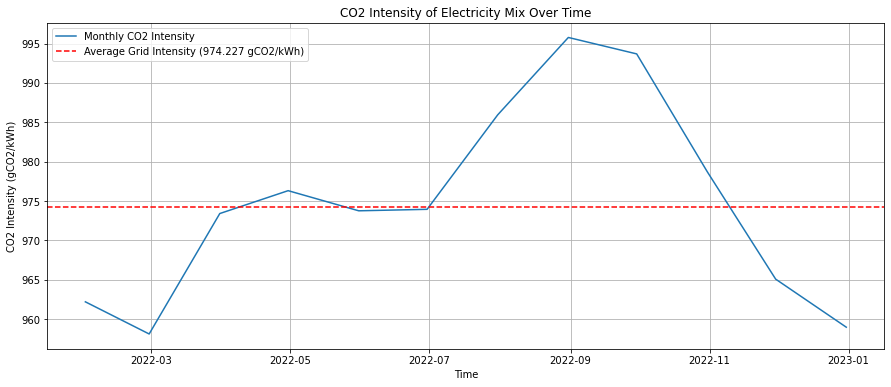

In [20]:
#  Plot
plt.figure(figsize=(15, 6))
plt.plot(monthly_data['CO2 Intensity (gCO2/kWh)'], label='Monthly CO2 Intensity')
plt.axhline(y=average_grid_intensity, color='r', linestyle='--', label=f'Average Grid Intensity ({average_grid_intensity:.3f} gCO2/kWh)')
plt.title('CO2 Intensity of Electricity Mix Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Intensity (gCO2/kWh)')
plt.legend()
plt.grid(True)
plt.show()

# Statistics and plots

In [21]:
df[['CO2 Intensity (gCO2/kWh)']].describe()

,CO2 Intensity (gCO2/kWh)
count,8760.000000
mean,974.758007
std,18.601095
min,905.210813
25%,961.709861
50%,975.921698
75%,989.178716
max,1033.303158


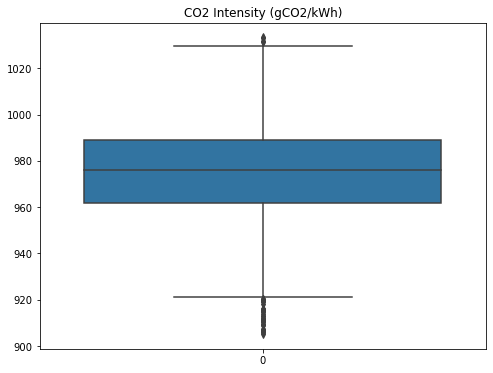

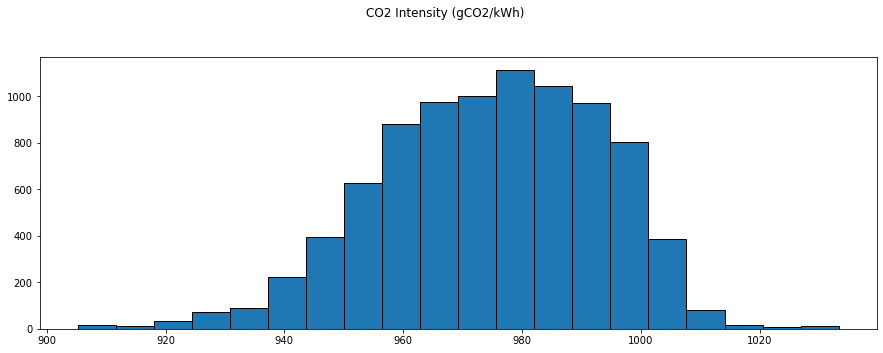

In [22]:
df['Total CO2 Emissions (metric tons CO2)']=df['Total CO2 Emissions (gCO2)']/1000_000
selected_columns = ['Total CO2 Emissions (metric tons CO2)', 'Total Generation (MW)', 'CO2 Intensity (gCO2/kWh)']
selected_column1 = 'CO2 Intensity (gCO2/kWh)'

# Sub the DataFrame 
subset_df = df[selected_columns]
subset1_df = df[selected_column1]
#  box plots for each column
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset1_df)
plt.title('CO2 Intensity (gCO2/kWh)')
plt.show();

# histograms for each  column
plt.figure(figsize=(12, 6))
subset1_df.hist(bins=20, edgecolor='black', grid=False, figsize=(15, 5))
plt.suptitle('CO2 Intensity (gCO2/kWh)', y=1.02)
plt.show();

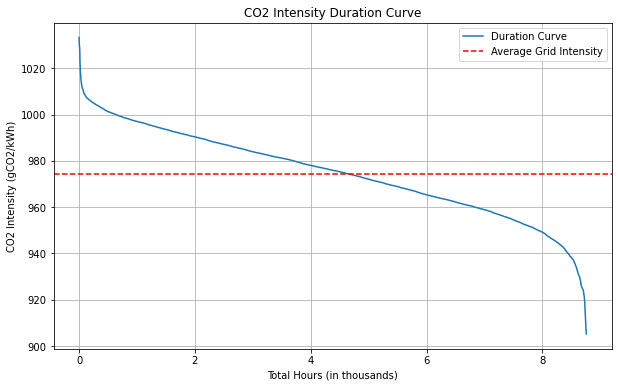

In [23]:
# Sort the DataFrame by CO2 Intensity in descending order
df = df.sort_values(by='CO2 Intensity (gCO2/kWh)', ascending=False)

# Create a cumulative distribution function (CDF)
df['Cumulative Hours'] = df['CO2 Intensity (gCO2/kWh)'].cumsum()



# Create x-axis values in thousands of hours
total_hours_in_thousands = np.arange(0, len(df)) * 0.001

# Plot the Duration Curve
plt.figure(figsize=(10, 6))
plt.plot(total_hours_in_thousands, df['CO2 Intensity (gCO2/kWh)'], label='Duration Curve')
plt.axhline(y=average_grid_intensity, color='r', linestyle='--', label='Average Grid Intensity')
plt.title('CO2 Intensity Duration Curve')
plt.xlabel('Total Hours (in thousands)')
plt.ylabel('CO2 Intensity (gCO2/kWh)')
plt.grid(True)
plt.legend()
plt.show()

# Task 3.1 share of Renewable for the years as Piecharts

In [24]:
# List of CSV files for each year
yearly_csv_files = ['F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201501010000-201601010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201601010000-201701010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201701010000-201801010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201801010000-201901010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201901010000-202001010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202001010000-202101010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202101010000-202201010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202201010000-202301010000.csv'
                   ]

# Initialize an empty list to store DataFrames for each year
dfs = []

# Read each CSV file and append it to the list
for csv_file in yearly_csv_files:
    year_df = pd.read_csv(csv_file)
    dfs.append(year_df)

# Concatenate the list of DataFrames into one big DataFrame
big_df = pd.concat(dfs, ignore_index=True)
# Categorize column names and calculate the hourly sums and add it to the DataFrame:
big_df['Renewable'] = big_df[renewable_categories].apply(clean_and_sum, axis=1)
big_df['Fossil'] = big_df[fossil_categories].apply(clean_and_sum, axis=1)

# Total categories for the pie chart for the whole Year.
total_renewable = big_df['Renewable'].sum()
total_fossil = big_df['Fossil'].sum()

###########
# Preparation for the PieGraphs:
# Extract column names from the first row of the DataFrame (ignore the first two columns and the last two columns)
column_names = big_df.columns[2:-2]

# Convert columns to numeric values and sum them
total_by_energy_form = big_df[column_names].apply(pd.to_numeric, errors='coerce').sum()

# Sort the categories in descending order by the total sum
sorted_column_names = total_by_energy_form.sort_values(ascending=False).index
###########

###########
# Preparation for Task 1.2 by aggregating the column weekly daily and monthly
# Convert the MTU to a daytime object for calculations 
big_df['MTU'] = pd.to_datetime(big_df['MTU'].str.extract(r'(\d{2}\.\d{2}\.\d{4} \d{2}:\d{2})')[0], format='%d.%m.%Y %H:%M')

# Create columns for day, week, month, and year
big_df['Day'] = big_df['MTU'].dt.day
big_df['Week'] = big_df['MTU'].dt.isocalendar().week
big_df['Month'] = big_df['MTU'].dt.month
big_df['Year'] = big_df['MTU'].dt.year

big_df.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Renewable,Fossil,Day,Week,Month,Year
0,BZN|PL,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,n/e,n/e,n/e,1415.0,1415.0,0.0,1,1,1,2015
1,BZN|PL,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,n/e,n/e,n/e,1440.0,1440.0,0.0,1,1,1,2015
2,BZN|PL,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,n/e,n/e,n/e,1444.0,1444.0,0.0,1,1,1,2015
3,BZN|PL,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,n/e,n/e,n/e,1509.0,1509.0,0.0,1,1,1,2015
4,BZN|PL,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,n/e,n/e,n/e,1548.0,1548.0,0.0,1,1,1,2015


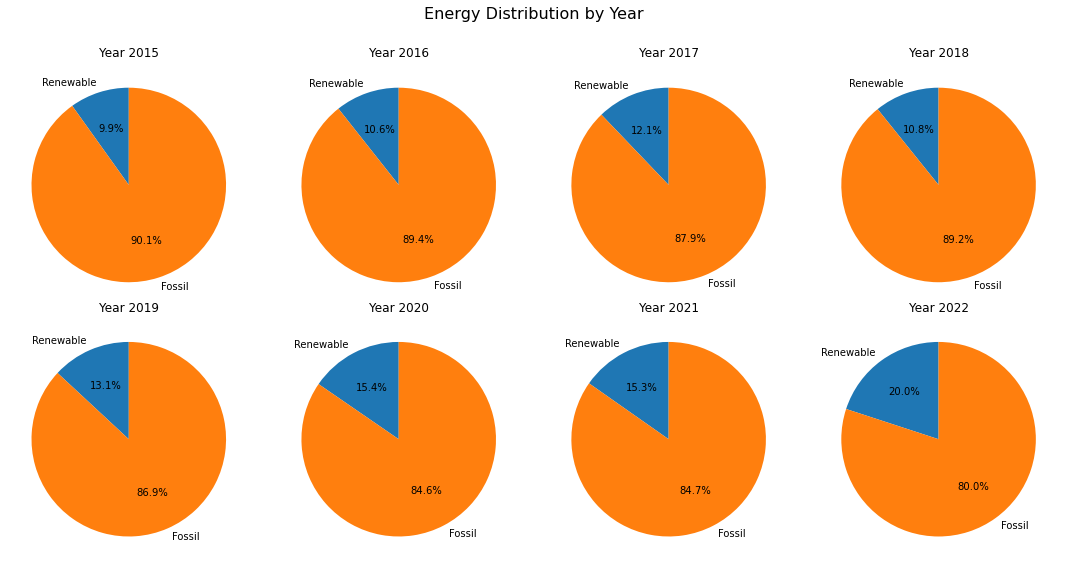

In [25]:
# Create a Figure with subplots for each year
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Energy Distribution by Year', fontsize=16)

# Iterate through the years from 2015 to 2022 and create Pie-Charts
for idx, year in enumerate(range(2015, 2023)):
    # Filter the DataFrame for the selected year
    selected_data = big_df[big_df['Year'] == year]

    # Calculate the sum of renewable and fossil energies for the selected year
    renewable_sum = selected_data['Renewable'].sum()
    fossil_sum = selected_data['Fossil'].sum()

    # Plot the Pie-Chart in the corresponding subplot
    ax = axes[idx // 4, idx % 4]
    labels = ['Renewable', 'Fossil']
    sizes = [renewable_sum, fossil_sum]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Year {year}')

# Adjust the layout and show the Figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


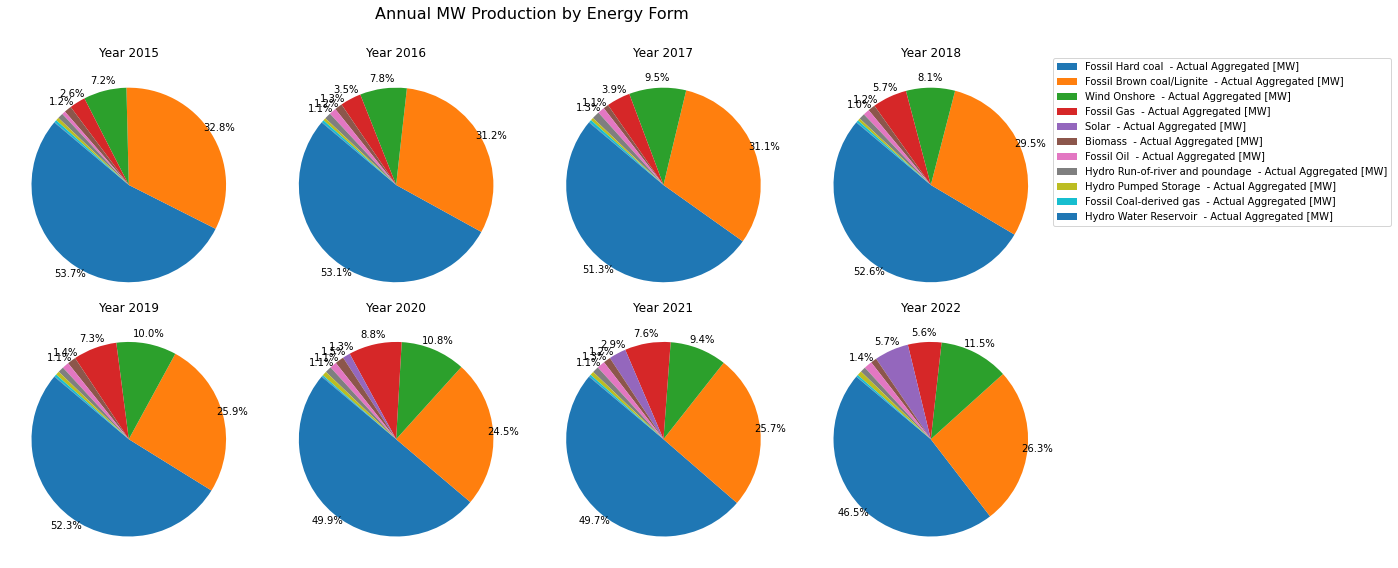

In [26]:
# Create a Figure with subplots for each year
# Filter out columns without numbers
columns_with_numbers = [column for column in sorted_column_names if big_df[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna().any()]
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Annual MW Production by Energy Form', fontsize=16)

# Iterate through the years from 2015 to 2022 and create Pie-Charts
for idx, year in enumerate(range(2015, 2023)):
    # Filter the DataFrame for the selected year
    selected_data = big_df[big_df['Year'] == year]

    # Calculate the total MW production for each energy form for the selected year
    total_by_energy_form_year = selected_data[sorted_column_names].apply(pd.to_numeric, errors='coerce').sum()

    # Plot the Pie-Chart in the corresponding subplot
    ax = axes[idx // 4, idx % 4]
    ax.pie(total_by_energy_form_year, labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=140, pctdistance=1.1)
    ax.set_title(f'Year {year}')

# Add a simple legend below the figure
fig.legend(columns_with_numbers, bbox_to_anchor=(1.3, 0.9))

# Adjust the layout and show the Figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Task 3

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepaths =['F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201501010000-201601010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201601010000-201701010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201701010000-201801010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201801010000-201901010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_201901010000-202001010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202001010000-202101010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202101010000-202201010000.csv',
                    'F:\RED\Energy Data Engineering\Excel files\Actual Generation per Production Type_202201010000-202301010000.csv'
                   ]

In [28]:
list_actual_gen = [pd.read_csv(file) for file in filepaths]

In [29]:
df_actual_gen = pd.concat(list_actual_gen)

In [30]:
df_actual_gen.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|PL,01.01.2015 00:00 - 01.01.2015 01:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,NaN,NaN,n/e,n/e,n/e,n/e,n/e,n/e,n/e,1415.0
1,BZN|PL,01.01.2015 01:00 - 01.01.2015 02:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,NaN,NaN,n/e,n/e,n/e,n/e,n/e,n/e,n/e,1440.0
2,BZN|PL,01.01.2015 02:00 - 01.01.2015 03:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,NaN,NaN,n/e,n/e,n/e,n/e,n/e,n/e,n/e,1444.0
3,BZN|PL,01.01.2015 03:00 - 01.01.2015 04:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,NaN,NaN,n/e,n/e,n/e,n/e,n/e,n/e,n/e,1509.0
4,BZN|PL,01.01.2015 04:00 - 01.01.2015 05:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,n/e,n/e,...,NaN,NaN,n/e,n/e,n/e,n/e,n/e,n/e,n/e,1548.0


# 1. Visualize the mix of generation technologies for the years 2015 – 2022.
-▪ Choose an adequate temporal resolution and type of plot to reveal the major trends.-
▪ Plot the CO2 intensity of electricity (kg CO2/kWh) in the same graph.

In [31]:
df_2015 = df_actual_gen[df_actual_gen["MTU"].str.contains("2015")]
df_2016 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2016")) & ~df_actual_gen["MTU"].str.contains("2015")]
df_2017 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2017")) & ~df_actual_gen["MTU"].str.contains("2016")]
df_2018 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2018")) & ~df_actual_gen["MTU"].str.contains("2017")]
df_2019 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2019")) & ~df_actual_gen["MTU"].str.contains("2018")]
df_2020 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2020")) & ~df_actual_gen["MTU"].str.contains("2019")]
df_2021 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2021")) & ~df_actual_gen["MTU"].str.contains("2020")]
df_2022 = df_actual_gen[(df_actual_gen["MTU"].str.contains("2022")) & ~df_actual_gen["MTU"].str.contains("2021")]

In [32]:
date_Year = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
new_columns = []
for column in df_actual_gen.columns:
    if column != "Area" and column != "MTU":
        new_columns.append(column)
new_columns

['Biomass  - Actual Aggregated [MW]',
 'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
 'Fossil Coal-derived gas  - Actual Aggregated [MW]',
 'Fossil Gas  - Actual Aggregated [MW]',
 'Fossil Hard coal  - Actual Aggregated [MW]',
 'Fossil Oil  - Actual Aggregated [MW]',
 'Fossil Oil shale  - Actual Aggregated [MW]',
 'Fossil Peat  - Actual Aggregated [MW]',
 'Geothermal  - Actual Aggregated [MW]',
 'Hydro Pumped Storage  - Actual Aggregated [MW]',
 'Hydro Pumped Storage  - Actual Consumption [MW]',
 'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
 'Hydro Water Reservoir  - Actual Aggregated [MW]',
 'Marine  - Actual Aggregated [MW]',
 'Nuclear  - Actual Aggregated [MW]',
 'Other  - Actual Aggregated [MW]',
 'Other renewable  - Actual Aggregated [MW]',
 'Solar  - Actual Aggregated [MW]',
 'Waste  - Actual Aggregated [MW]',
 'Wind Offshore  - Actual Aggregated [MW]',
 'Wind Onshore  - Actual Aggregated [MW]']

In [33]:
# Convert all columns to numeric, coercing errors to NaN for non-numeric values
df_2015_numeric = df_2015.apply(pd.to_numeric, errors='coerce')
df_2015_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2016_numeric = df_2016.apply(pd.to_numeric, errors='coerce')
df_2016_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2017_numeric = df_2017.apply(pd.to_numeric, errors='coerce')
df_2017_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2018_numeric = df_2018.apply(pd.to_numeric, errors='coerce')
df_2018_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2019_numeric = df_2019.apply(pd.to_numeric, errors='coerce')
df_2019_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2020_numeric = df_2020.apply(pd.to_numeric, errors='coerce')
df_2020_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2021_numeric = df_2021.apply(pd.to_numeric, errors='coerce')
df_2021_numeric.drop(columns=["Area", "MTU"], inplace=True)

df_2022_numeric = df_2022.apply(pd.to_numeric, errors='coerce')
df_2022_numeric.drop(columns=["Area", "MTU"], inplace=True)

In [34]:
df_2015_new = pd.DataFrame(df_2015_numeric.sum())
df_2016_new = pd.DataFrame(df_2016_numeric.sum())
df_2017_new = pd.DataFrame(df_2017_numeric.sum())
df_2018_new = pd.DataFrame(df_2018_numeric.sum())
df_2019_new = pd.DataFrame(df_2019_numeric.sum())
df_2020_new = pd.DataFrame(df_2020_numeric.sum())
df_2021_new = pd.DataFrame(df_2021_numeric.sum())
df_2022_new = pd.DataFrame(df_2022_numeric.sum())

In [35]:
df_result = pd.concat([df_2015_new.transpose(), df_2016_new.transpose(), df_2017_new.transpose(), df_2018_new.transpose(), df_2019_new.transpose(), df_2020_new.transpose(), df_2021_new.transpose(), df_2022_new.transpose()])

In [36]:
df_result

,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Geothermal - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,1794667.0,48708540.0,579817.0,3931284.0,79617404.0,860412.0,0.0,0.0,0.0,788645.0,...,1341814.0,118422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10612438.0
0,1887896.0,46616030.0,556829.0,5189957.0,79215270.0,1733469.0,0.0,0.0,0.0,682689.0,...,1571429.0,129121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11608217.0
0,1310197.0,47292119.0,629769.0,6000947.0,78043734.0,1734816.0,0.0,0.0,0.0,708133.0,...,1908984.0,145396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14411925.0
0,1800677.0,44690985.0,543385.0,8683353.0,79678396.0,1572670.0,0.0,0.0,0.0,633012.0,...,1470192.0,102936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12326061.0
0,2065971.0,37770878.0,549897.0,10579445.0,76224529.0,1621627.0,0.0,0.0,0.0,912074.0,...,1405739.0,125241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14565799.0
0,2083592.0,34577091.0,286459.0,12466074.0,70463948.0,1598967.0,0.0,0.0,0.0,1062925.0,...,1487818.0,136922.0,0.0,0.0,0.0,0.0,1764742.0,0.0,0.0,15213658.0
0,1923490.0,41570636.0,522239.0,12281156.0,80323498.0,2136560.0,0.0,0.0,0.0,1016456.0,...,1700951.0,136182.0,0.0,0.0,0.0,0.0,4614602.0,0.0,0.0,15248852.0
0,1613312.0,42717526.0,493303.0,9056023.0,75716374.0,2206560.0,0.0,0.0,0.0,1266803.0,...,1455754.0,89670.0,0.0,0.0,0.0,0.0,9290407.0,0.0,0.0,18774995.0


In [37]:
date_Year = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df_result.insert(0, "Year", date_Year)

In [38]:
df_result.head()

,Year,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Geothermal - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,2015,1794667.0,48708540.0,579817.0,3931284.0,79617404.0,860412.0,0.0,0.0,0.0,...,1341814.0,118422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10612438.0
0,2016,1887896.0,46616030.0,556829.0,5189957.0,79215270.0,1733469.0,0.0,0.0,0.0,...,1571429.0,129121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11608217.0
0,2017,1310197.0,47292119.0,629769.0,6000947.0,78043734.0,1734816.0,0.0,0.0,0.0,...,1908984.0,145396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14411925.0
0,2018,1800677.0,44690985.0,543385.0,8683353.0,79678396.0,1572670.0,0.0,0.0,0.0,...,1470192.0,102936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12326061.0
0,2019,2065971.0,37770878.0,549897.0,10579445.0,76224529.0,1621627.0,0.0,0.0,0.0,...,1405739.0,125241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14565799.0


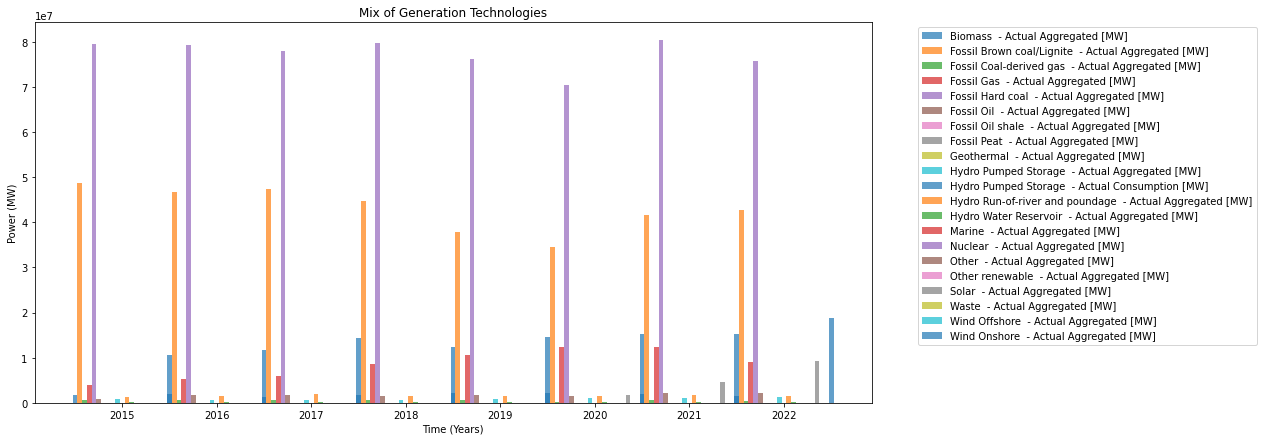

<Figure size 1080x504 with 0 Axes>

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))

# Numbers of pairs of bars you want
N = 8

# Position of bars on x-axis
ind = np.arange(N)

# Width of a bar 
width = 0.05

# Iterate through columns and plot bars
for i, col in enumerate(new_columns):
    ax.bar(ind + width * i, df_result[col], width, alpha=0.7, linewidth=3, label=col)

# Set x-axis ticks at the center of each group of bars
plt.figure(figsize=(15, 7))
ax.set_xticks(ind + width * (len(new_columns) - 1) / 2)
ax.set_xticklabels(date_Year)
ax.set_xlabel("Time (Years)")
ax.set_ylabel("Power (MW)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title("Mix of Generation Technologies")
plt.show()

## 2. What kind of trends can you observe regarding:
▪ Total generation
▪ Share of renewables
▪ Share of gas plants
▪ Share of coal plants
▪ CO2 intensity
➔ Conduct a linear regression for these objects

In [40]:
df_gen = df_actual_gen.copy()

In [41]:
df_gen.isna().sum()

Area                                                             0
MTU                                                              0
Biomass  - Actual Aggregated [MW]                               32
Fossil Brown coal/Lignite  - Actual Aggregated [MW]             32
Fossil Coal-derived gas  - Actual Aggregated [MW]               32
Fossil Gas  - Actual Aggregated [MW]                            32
Fossil Hard coal  - Actual Aggregated [MW]                      32
Fossil Oil  - Actual Aggregated [MW]                          4495
Fossil Oil shale  - Actual Aggregated [MW]                       8
Fossil Peat  - Actual Aggregated [MW]                            8
Geothermal  - Actual Aggregated [MW]                             8
Hydro Pumped Storage  - Actual Aggregated [MW]                  32
Hydro Pumped Storage  - Actual Consumption [MW]              70136
Hydro Run-of-river and poundage  - Actual Aggregated [MW]       32
Hydro Water Reservoir  - Actual Aggregated [MW]               

In [42]:
df_gen=df_gen.ffill()

In [43]:
df_gen.isna().sum()

Area                                                             0
MTU                                                              0
Biomass  - Actual Aggregated [MW]                               24
Fossil Brown coal/Lignite  - Actual Aggregated [MW]             24
Fossil Coal-derived gas  - Actual Aggregated [MW]               24
Fossil Gas  - Actual Aggregated [MW]                            24
Fossil Hard coal  - Actual Aggregated [MW]                      24
Fossil Oil  - Actual Aggregated [MW]                          4488
Fossil Oil shale  - Actual Aggregated [MW]                       0
Fossil Peat  - Actual Aggregated [MW]                            0
Geothermal  - Actual Aggregated [MW]                             0
Hydro Pumped Storage  - Actual Aggregated [MW]                  24
Hydro Pumped Storage  - Actual Consumption [MW]              70136
Hydro Run-of-river and poundage  - Actual Aggregated [MW]       24
Hydro Water Reservoir  - Actual Aggregated [MW]               

In [44]:
(df_gen=='n/e').sum()

Area                                                             0
MTU                                                              0
Biomass  - Actual Aggregated [MW]                                0
Fossil Brown coal/Lignite  - Actual Aggregated [MW]              0
Fossil Coal-derived gas  - Actual Aggregated [MW]                0
Fossil Gas  - Actual Aggregated [MW]                             0
Fossil Hard coal  - Actual Aggregated [MW]                       0
Fossil Oil  - Actual Aggregated [MW]                             0
Fossil Oil shale  - Actual Aggregated [MW]                   70136
Fossil Peat  - Actual Aggregated [MW]                        70136
Geothermal  - Actual Aggregated [MW]                         70136
Hydro Pumped Storage  - Actual Aggregated [MW]                   0
Hydro Pumped Storage  - Actual Consumption [MW]                  0
Hydro Run-of-river and poundage  - Actual Aggregated [MW]        0
Hydro Water Reservoir  - Actual Aggregated [MW]               

In [45]:
ne_columns = df_gen.columns[df_gen.eq('n/e').all()]

# Drop columns with only 'n/e' values
df_gen = df_gen.drop(ne_columns, axis=1)
df_gen

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],Hydro Pumped Storage - Actual Consumption [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|PL,01.01.2015 00:00 - 01.01.2015 01:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1415.0
1,BZN|PL,01.01.2015 01:00 - 01.01.2015 02:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1440.0
2,BZN|PL,01.01.2015 02:00 - 01.01.2015 03:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1444.0
3,BZN|PL,01.01.2015 03:00 - 01.01.2015 04:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1509.0
4,BZN|PL,01.01.2015 04:00 - 01.01.2015 05:00 (CET/CEST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BZN|PL,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),251.0,2331.0,50.0,866.0,5478.0,318.0,138.0,NaN,261.0,57.0,0.0,6828.0
8757,BZN|PL,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),251.0,1734.0,49.0,824.0,5233.0,331.0,9.0,NaN,239.0,7.0,0.0,6834.0
8758,BZN|PL,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),252.0,1536.0,49.0,827.0,5264.0,316.0,0.0,NaN,223.0,0.0,0.0,6484.0
8759,BZN|PL,31.12.2022 22:00 - 31.12.2022 23:00 (CET/CEST),252.0,1536.0,50.0,825.0,5204.0,316.0,0.0,NaN,214.0,0.0,0.0,6444.0


In [46]:
df_gen.columns

Index(['Area', 'MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]'],
      dtype='object')

In [47]:
df_gen['MTU'] = df_gen['MTU'].str.strip()

# Split 'MTU' column and create 'Start_Time' and 'End_Time' columns
df_gen[['StartTime', 'EndTime']] = df_gen['MTU'].str.split('-', expand=True)

# Strip leading and trailing spaces
df_gen['StartTime'] = df_gen['StartTime'].str.strip()
df_gen['EndTime'] = df_gen['EndTime'].str.strip()

# Convert to datetime
df_gen['StartTime'] = pd.to_datetime(df_gen['StartTime'], format='%d.%m.%Y %H:%M', errors='coerce')
df_gen['EndTime'] = pd.to_datetime(df_gen['EndTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Rearrange columns
column_order = ['MTU', 'StartTime', 'EndTime'] + [col for col in df_gen.columns if col not in ['MTU', 'StartTime', 'EndTime']]
df_gen = df_gen[column_order]

In [48]:
# Set 'StartTime' as the index
df_gen.set_index('StartTime', inplace=True)

In [49]:
df_gen

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],Hydro Pumped Storage - Actual Consumption [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
StartTime,,,,,,,,,,,,,,,
2015-01-01 00:00:00,01.01.2015 00:00 - 01.01.2015 01:00 (CET/CEST),NaT,BZN|PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1415.0
2015-01-01 01:00:00,01.01.2015 01:00 - 01.01.2015 02:00 (CET/CEST),NaT,BZN|PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1440.0
2015-01-01 02:00:00,01.01.2015 02:00 - 01.01.2015 03:00 (CET/CEST),NaT,BZN|PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1444.0
2015-01-01 03:00:00,01.01.2015 03:00 - 01.01.2015 04:00 (CET/CEST),NaT,BZN|PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1509.0
2015-01-01 04:00:00,01.01.2015 04:00 - 01.01.2015 05:00 (CET/CEST),NaT,BZN|PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/e,1548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),NaT,BZN|PL,251.0,2331.0,50.0,866.0,5478.0,318.0,138.0,NaN,261.0,57.0,0.0,6828.0
2022-12-31 20:00:00,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),NaT,BZN|PL,251.0,1734.0,49.0,824.0,5233.0,331.0,9.0,NaN,239.0,7.0,0.0,6834.0
2022-12-31 21:00:00,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),NaT,BZN|PL,252.0,1536.0,49.0,827.0,5264.0,316.0,0.0,NaN,223.0,0.0,0.0,6484.0


In [50]:
df_gen = df_gen.apply(pd.to_numeric, errors='coerce')

In [51]:
df_gen["Share_Renewable"]=df_gen["Hydro Pumped Storage  - Actual Aggregated [MW]"]+df_gen["Hydro Water Reservoir  - Actual Aggregated [MW]"]+df_gen["Solar  - Actual Aggregated [MW]"]+df_gen["Wind Onshore  - Actual Aggregated [MW]"]+df_gen["Hydro Run-of-river and poundage  - Actual Aggregated [MW]"]
df_gen["Share_Renewable"]=pd.DataFrame(df_gen["Share_Renewable"])

df_gen["Share_Gas"]=df_gen["Fossil Coal-derived gas  - Actual Aggregated [MW]"]+df_gen["Fossil Gas  - Actual Aggregated [MW]"]
df_gen["Share_Gas"]=pd.DataFrame(df_gen["Share_Gas"])

In [52]:
df_gen_new = df_gen.copy()

In [53]:
for col in df_gen.columns:
    if col!="MTU" and col!="Area" and col!="EndTime":
        df_gen_new[col]=df_gen_new[col]/1000

In [54]:
df_gen_new

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],Hydro Pumped Storage - Actual Consumption [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Share_Renewable,Share_Gas
StartTime,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.415,NaN,NaN
2015-01-01 01:00:00,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.440,NaN,NaN
2015-01-01 02:00:00,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.444,NaN,NaN
2015-01-01 03:00:00,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.509,NaN,NaN
2015-01-01 04:00:00,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.548,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,NaN,-9223372036854775808,NaN,0.251,2.331,0.050,0.866,5.478,0.318,0.138,NaN,0.261,0.057,0.0,6.828,7.284,0.916
2022-12-31 20:00:00,NaN,-9223372036854775808,NaN,0.251,1.734,0.049,0.824,5.233,0.331,0.009,NaN,0.239,0.007,0.0,6.834,7.089,0.873
2022-12-31 21:00:00,NaN,-9223372036854775808,NaN,0.252,1.536,0.049,0.827,5.264,0.316,0.000,NaN,0.223,0.000,0.0,6.484,6.707,0.876


In [55]:
# Replace the columns names
df_gen_new.rename(columns={'Biomass  - Actual Aggregated [MW]': 'Biomass  - Actual Aggregated [GW]', 
                           'Fossil Brown coal/Lignite  - Actual Aggregated [MW]': 'Fossil Brown coal/Lignite  - Actual Aggregated [GW]',
                           'Fossil Coal-derived gas  - Actual Aggregated [MW]': 'Fossil Coal-derived gas  - Actual Aggregated [GW]',
                           'Fossil Gas  - Actual Aggregated [MW]': 'Fossil Gas  - Actual Aggregated [GW]',
                           'Fossil Hard coal  - Actual Aggregated [MW]': 'Fossil Hard coal  - Actual Aggregated [GW]',
                           'Fossil Oil  - Actual Aggregated [MW]': 'Fossil Oil  - Actual Aggregated [GW]',
                           'Hydro Pumped Storage  - Actual Aggregated [MW]': 'Hydro Pumped Storage  - Actual Aggregated [GW]',
                           'Hydro Pumped Storage  - Actual Consumption [MW]': 'Hydro Pumped Storage  - Actual Consumption [GW]',
                           'Hydro Run-of-river and poundage  - Actual Aggregated [MW]': 'Hydro Run-of-river and poundage  - Actual Aggregated [GW]',
                           'Hydro Water Reservoir  - Actual Aggregated [MW]': 'Hydro Water Reservoir  - Actual Aggregated [GW]',
                           'Solar  - Actual Aggregated [MW]': 'Solar  - Actual Aggregated [GW]',
                           'Wind Onshore  - Actual Aggregated [MW]': 'Wind Onshore  - Actual Aggregated [GW]'
                          }, inplace=True)

### ▪ Total generation
### ▪ Share of renewables
### ▪ Share of gas plants
### ▪ Share of coal plants
### ▪ CO2 intensity

In [56]:
Fossil_brown_coal_Lignite=df_gen_new["Fossil Brown coal/Lignite  - Actual Aggregated [GW]"].sum()
Fossil_Hard_coal=df_gen_new["Fossil Hard coal  - Actual Aggregated [GW]"].sum()
Share_Gas=df_gen_new["Share_Gas"].sum()
Share_Renewable =df_gen_new["Share_Renewable"].sum()
Fossil_oil=df_gen_new["Fossil Oil  - Actual Aggregated [GW]"].sum()

print("Share of Renewables: "+str(Share_Renewable)+" GW")
print("Share of Gas Plants: "+str(Share_Gas)+" GW")
print("Share of Coal Plants: "+str((Fossil_brown_coal_Lignite+Fossil_Hard_coal))+" GW")

print("Total Generation: "+str((Share_Renewable+Share_Gas+Fossil_brown_coal_Lignite+Fossil_Hard_coal+Fossil_oil))+" GW")

Share of Renewables: 66489.647 GW
Share of Gas Plants: 72358.23300000001 GW
Share of Coal Plants: 963309.756 GW
Total Generation: 1115624.265 GW


In [57]:
df_gen_new["Total_Generation"]=df_gen_new["Share_Gas"]+df_gen_new["Fossil Hard coal  - Actual Aggregated [GW]"]+df_gen_new["Fossil Brown coal/Lignite  - Actual Aggregated [GW]"]+df_gen_new["Share_Renewable"]+df_gen_new["Fossil Oil  - Actual Aggregated [GW]"]

In [58]:
Total_Generation = 1115624.265
Emission_factor_gas = 370.31
Emission_factor_lignite = 1158.65
Emission_factor_hard_coal = 942.41
Co2_emission2015_2022 = pd.DataFrame()
Fossil_gas_Co2=df_gen_new["Share_Gas"]*Emission_factor_gas
Lignite_Co2=df_gen_new["Fossil Brown coal/Lignite  - Actual Aggregated [GW]"]*Emission_factor_lignite
Hard_Coal_Co2=df_gen_new["Fossil Hard coal  - Actual Aggregated [GW]"]*Emission_factor_hard_coal
Co2_emission2015_2022["Fossil_gas_Co2 in (kgCO2/kWh)"]=Fossil_gas_Co2
Co2_emission2015_2022["Lignite_Co2 in (kgCO2/kWh)"]=Lignite_Co2
Co2_emission2015_2022["Hard_Coal_Co2 in (kgCO2/kWh)"]=Hard_Coal_Co2
Co2_emission2015_2022["Total_Emissions"]=(Fossil_gas_Co2+Lignite_Co2+Hard_Coal_Co2)/(Total_Generation*1000)
print("CO2 Intensity: "+str(Co2_emission2015_2022["Total_Emissions"].sum())+ " kgCO2/kWh.")

CO2 Intensity: 0.9044334289245584 kgCO2/kWh.


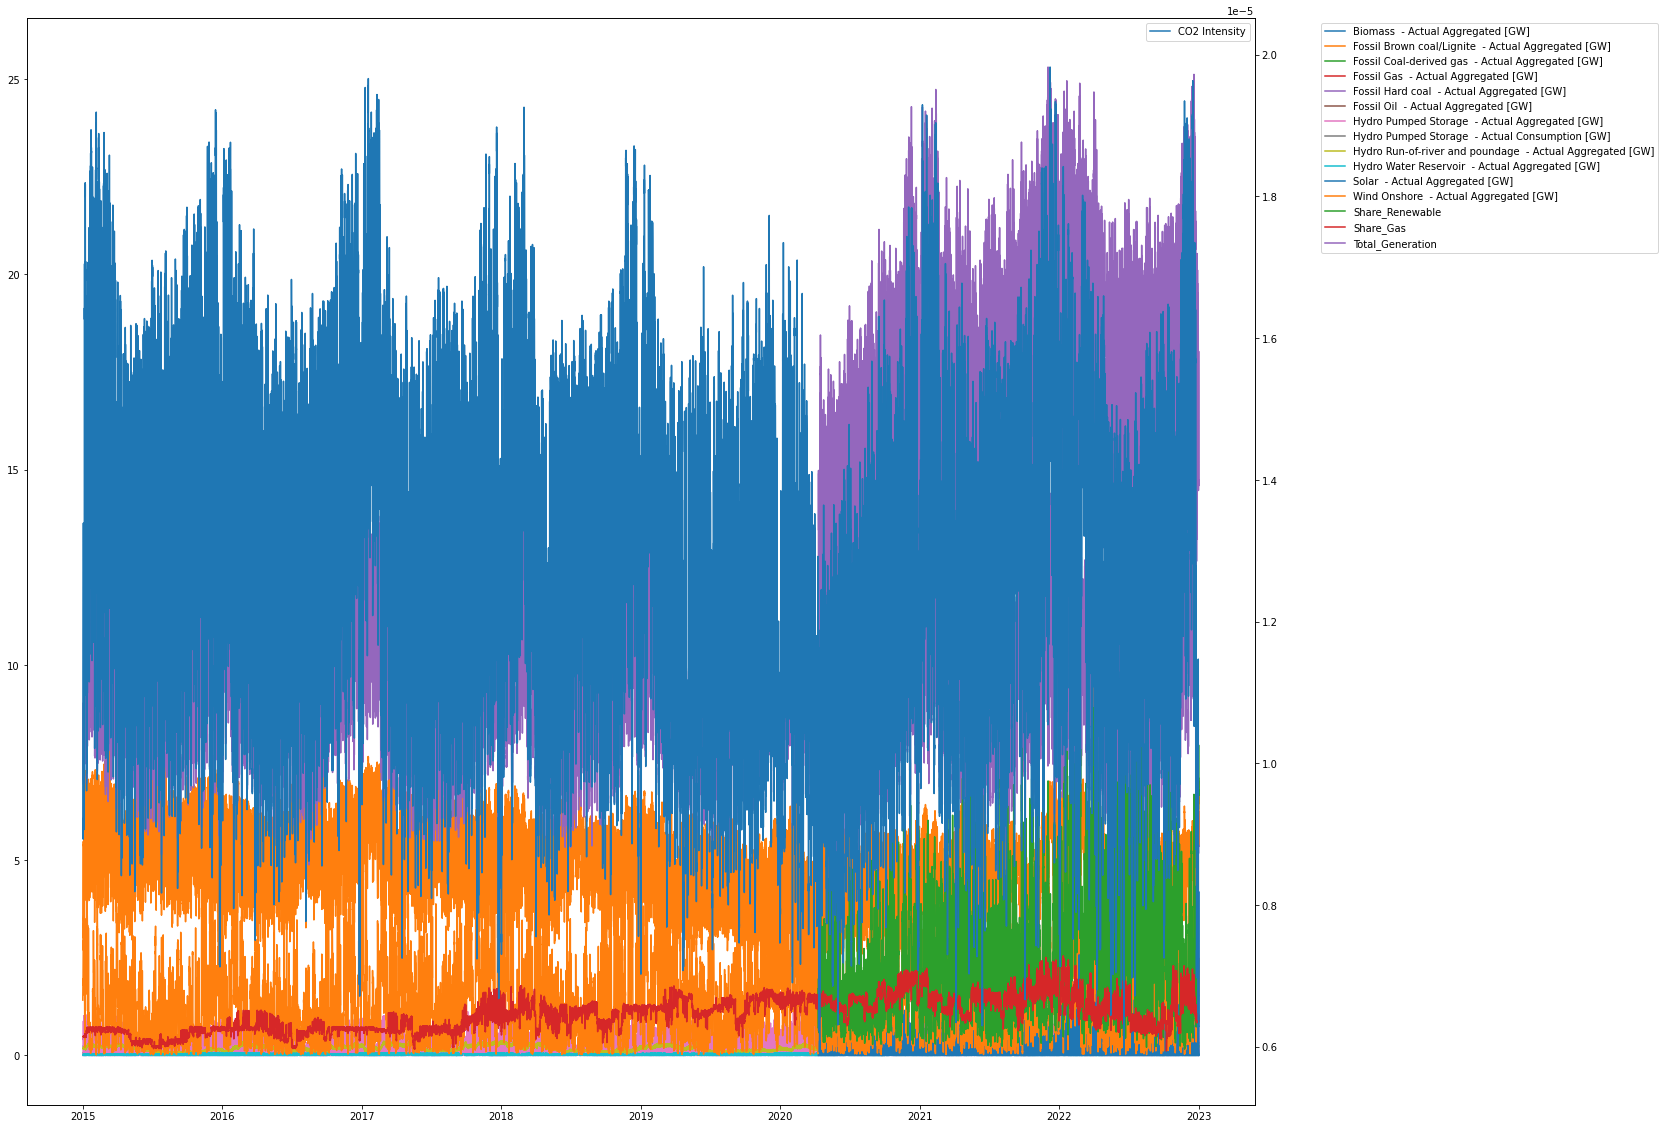

In [59]:
fig, ax = plt.subplots(figsize=(22, 20))

for col in df_gen_new.columns:
    if col!="MTU" and col!="Area" and col!="EndTime":
        ax.plot(df_gen_new.index, df_gen_new[col], label=col)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2 = ax.twinx()
ax2.plot(Co2_emission2015_2022.index, Co2_emission2015_2022["Total_Emissions"], label="CO2 Intensity")

plt.legend()
plt.show()

In [60]:
# Extract numeric columns for resampling (excluding datetime columns)
numeric_columns = df_gen_new.select_dtypes(include='number').columns
numeric_columns2 = Co2_emission2015_2022.select_dtypes(include='number').columns

# Resample numeric columns on a monthly basis (taking the mean)
monthly_data = df_gen_new[numeric_columns].resample('M').mean()
monthly_data_CO2 = Co2_emission2015_2022[numeric_columns2].resample('M').mean()

In [61]:
monthly_data

,MTU,EndTime,Area,Biomass - Actual Aggregated [GW],Fossil Brown coal/Lignite - Actual Aggregated [GW],Fossil Coal-derived gas - Actual Aggregated [GW],Fossil Gas - Actual Aggregated [GW],Fossil Hard coal - Actual Aggregated [GW],Fossil Oil - Actual Aggregated [GW],Hydro Pumped Storage - Actual Aggregated [GW],Hydro Pumped Storage - Actual Consumption [GW],Hydro Run-of-river and poundage - Actual Aggregated [GW],Hydro Water Reservoir - Actual Aggregated [GW],Solar - Actual Aggregated [GW],Wind Onshore - Actual Aggregated [GW],Share_Renewable,Share_Gas,Total_Generation
StartTime,,,,,,,,,,,,,,,,,,
2015-01-31,NaN,-9.223372e+18,NaN,0.091471,5.692037,0.061314,0.558443,9.784018,NaN,0.114172,NaN,0.232664,0.014507,NaN,1.653968,NaN,0.619757,NaN
2015-02-28,NaN,-9.223372e+18,NaN,0.206835,5.909260,0.062146,0.603482,10.151900,NaN,0.079786,NaN,0.222229,0.014521,NaN,1.069228,NaN,0.665628,NaN
2015-03-31,NaN,-9.223372e+18,NaN,0.236078,5.774934,0.061460,0.590327,9.123071,NaN,0.088745,NaN,0.227738,0.022515,NaN,1.279343,NaN,0.651786,NaN
2015-04-30,NaN,-9.223372e+18,NaN,0.227599,5.079036,0.062699,0.566040,8.582551,NaN,0.094454,NaN,0.234375,0.021151,NaN,1.409561,NaN,0.628739,NaN
2015-05-31,NaN,-9.223372e+18,NaN,0.201626,5.348941,0.067720,0.299325,8.400435,NaN,0.079391,NaN,0.184677,0.026458,NaN,0.873009,NaN,0.367046,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,NaN,-9.223372e+18,NaN,0.058126,5.176370,0.046085,0.646458,8.327981,0.201645,0.143522,NaN,0.105641,0.005813,1.690618,1.053019,2.998613,0.692543,17.397152
2022-09-30,NaN,-9.223372e+18,NaN,0.055757,4.899814,0.051110,0.619236,8.419094,0.224421,0.152761,NaN,0.116618,0.006497,1.271403,1.602050,3.149329,0.670346,17.363004
2022-10-31,NaN,-9.223372e+18,NaN,0.154313,4.700021,0.053576,0.928929,8.023099,0.255062,0.148674,NaN,0.139173,0.011948,1.010275,2.382671,3.692741,0.982505,17.653428


In [62]:
monthly_data_CO2

,Fossil_gas_Co2 in (kgCO2/kWh),Lignite_Co2 in (kgCO2/kWh),Hard_Coal_Co2 in (kgCO2/kWh),Total_Emissions
StartTime,,,,
2015-01-31,229.502194,6595.079249,9220.556456,0.000014
2015-02-28,246.488696,6846.764582,9567.252359,0.000015
2015-03-31,241.362981,6691.127441,8597.673564,0.000014
2015-04-30,232.828298,5884.825190,8088.282254,0.000013
2015-05-31,135.920693,6197.550328,7916.654404,0.000013
...,...,...,...,...
2022-08-31,256.455602,5997.600664,7848.372746,0.000013
2022-09-30,248.235766,5677.169362,7934.238795,0.000012
2022-10-31,363.831315,5445.679884,7561.049039,0.000012


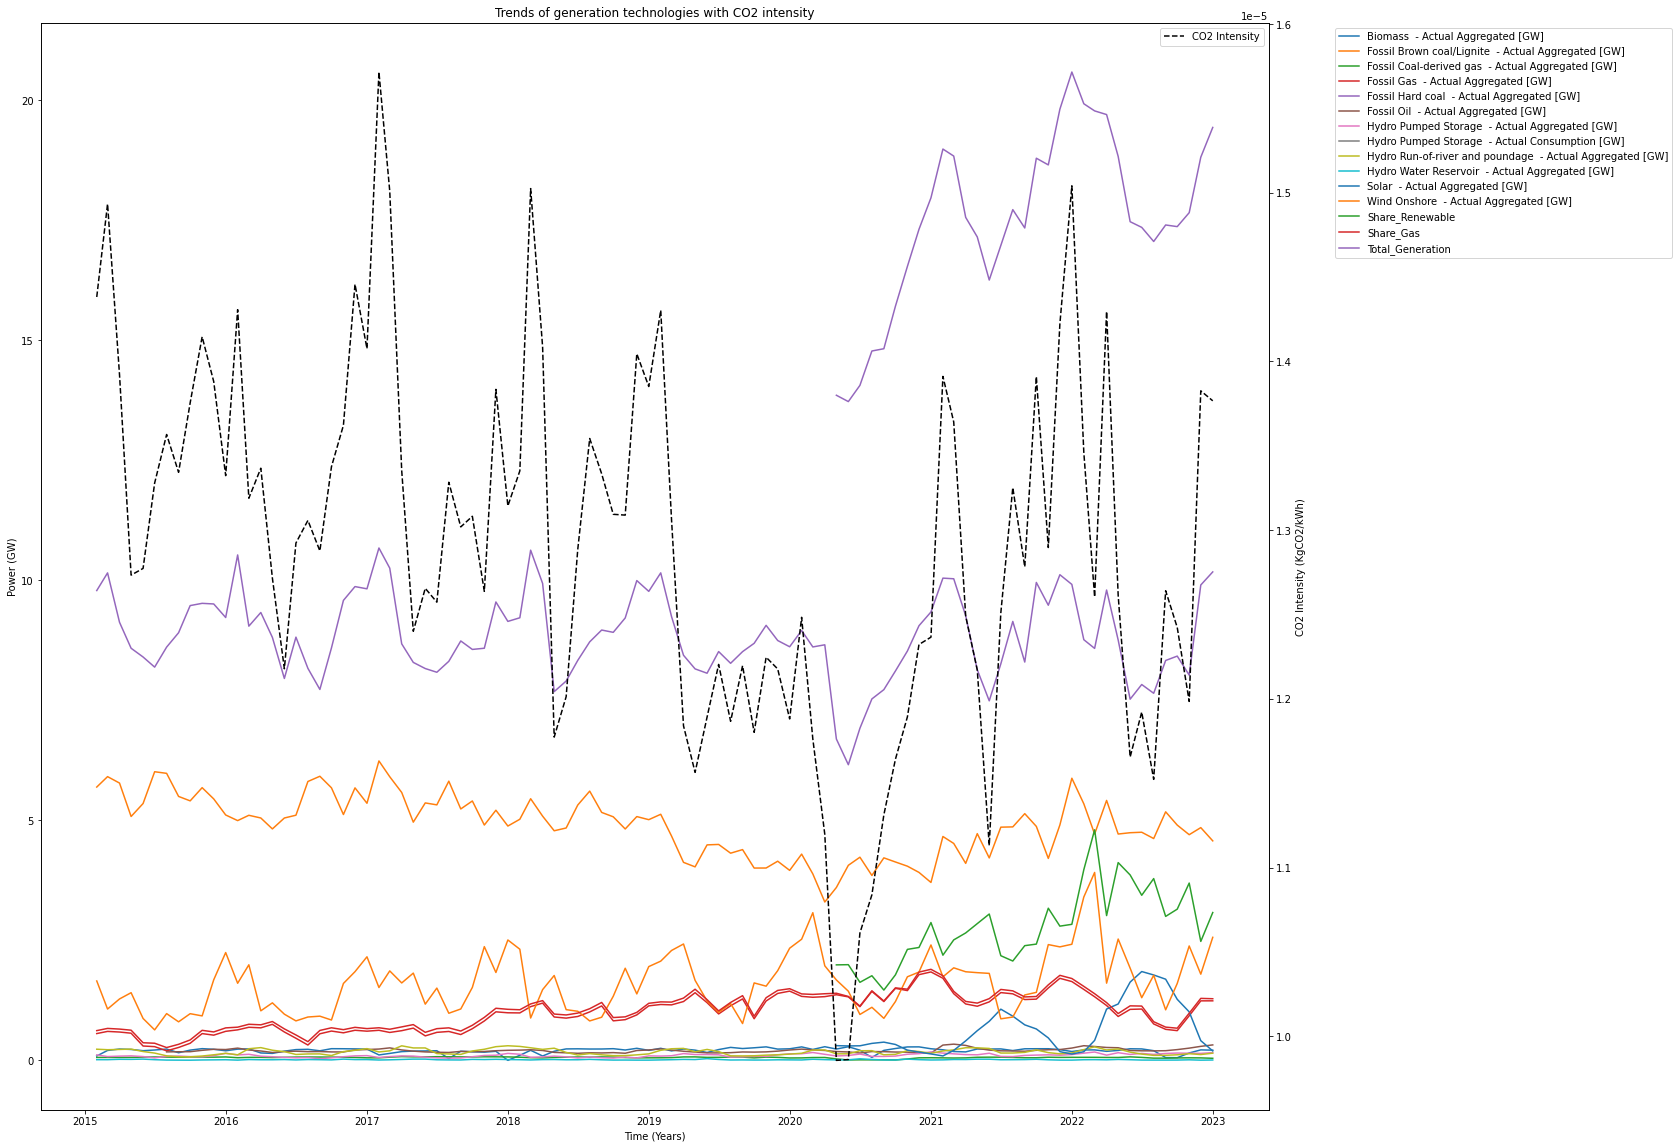

In [63]:
fig, ax = plt.subplots(figsize=(22, 20))

for col in monthly_data.columns:
    if col!="MTU" and col!="Area" and col!="EndTime":
        ax.plot(monthly_data.index, monthly_data[col], label=col)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time (Years)")
ax.set_ylabel("Power (GW)")

ax2 = ax.twinx()
ax2.plot(monthly_data_CO2.index, monthly_data_CO2["Total_Emissions"], label="CO2 Intensity", linestyle="--", color="black")
ax2.set_ylabel("CO2 Intensity (KgCO2/kWh)")

plt.title("Trends of generation technologies with CO2 intensity")
plt.legend()
plt.show()

In [64]:
monthly_data_new = monthly_data.copy()

monthly_data_new.reset_index(inplace=True)
monthly_data_new['timestamp'] = pd.to_datetime(monthly_data_new['StartTime']).astype('int64') / 10**9

In [65]:
monthly_data_new

,StartTime,MTU,EndTime,Area,Biomass - Actual Aggregated [GW],Fossil Brown coal/Lignite - Actual Aggregated [GW],Fossil Coal-derived gas - Actual Aggregated [GW],Fossil Gas - Actual Aggregated [GW],Fossil Hard coal - Actual Aggregated [GW],Fossil Oil - Actual Aggregated [GW],Hydro Pumped Storage - Actual Aggregated [GW],Hydro Pumped Storage - Actual Consumption [GW],Hydro Run-of-river and poundage - Actual Aggregated [GW],Hydro Water Reservoir - Actual Aggregated [GW],Solar - Actual Aggregated [GW],Wind Onshore - Actual Aggregated [GW],Share_Renewable,Share_Gas,Total_Generation,timestamp
0,2015-01-31,NaN,-9.223372e+18,NaN,0.091471,5.692037,0.061314,0.558443,9.784018,NaN,0.114172,NaN,0.232664,0.014507,NaN,1.653968,NaN,0.619757,NaN,1.422662e+09
1,2015-02-28,NaN,-9.223372e+18,NaN,0.206835,5.909260,0.062146,0.603482,10.151900,NaN,0.079786,NaN,0.222229,0.014521,NaN,1.069228,NaN,0.665628,NaN,1.425082e+09
2,2015-03-31,NaN,-9.223372e+18,NaN,0.236078,5.774934,0.061460,0.590327,9.123071,NaN,0.088745,NaN,0.227738,0.022515,NaN,1.279343,NaN,0.651786,NaN,1.427760e+09
3,2015-04-30,NaN,-9.223372e+18,NaN,0.227599,5.079036,0.062699,0.566040,8.582551,NaN,0.094454,NaN,0.234375,0.021151,NaN,1.409561,NaN,0.628739,NaN,1.430352e+09
4,2015-05-31,NaN,-9.223372e+18,NaN,0.201626,5.348941,0.067720,0.299325,8.400435,NaN,0.079391,NaN,0.184677,0.026458,NaN,0.873009,NaN,0.367046,NaN,1.433030e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-08-31,NaN,-9.223372e+18,NaN,0.058126,5.176370,0.046085,0.646458,8.327981,0.201645,0.143522,NaN,0.105641,0.005813,1.690618,1.053019,2.998613,0.692543,17.397152,1.661904e+09
92,2022-09-30,NaN,-9.223372e+18,NaN,0.055757,4.899814,0.051110,0.619236,8.419094,0.224421,0.152761,NaN,0.116618,0.006497,1.271403,1.602050,3.149329,0.670346,17.363004,1.664496e+09
93,2022-10-31,NaN,-9.223372e+18,NaN,0.154313,4.700021,0.053576,0.928929,8.023099,0.255062,0.148674,NaN,0.139173,0.011948,1.010275,2.382671,3.692741,0.982505,17.653428,1.667174e+09
94,2022-11-30,NaN,-9.223372e+18,NaN,0.218567,4.847313,0.051769,1.239486,9.900072,0.292149,0.145786,NaN,0.121454,0.004526,0.410483,1.795410,2.477660,1.291256,18.808449,1.669766e+09


### Conduct a linear regression for these objects

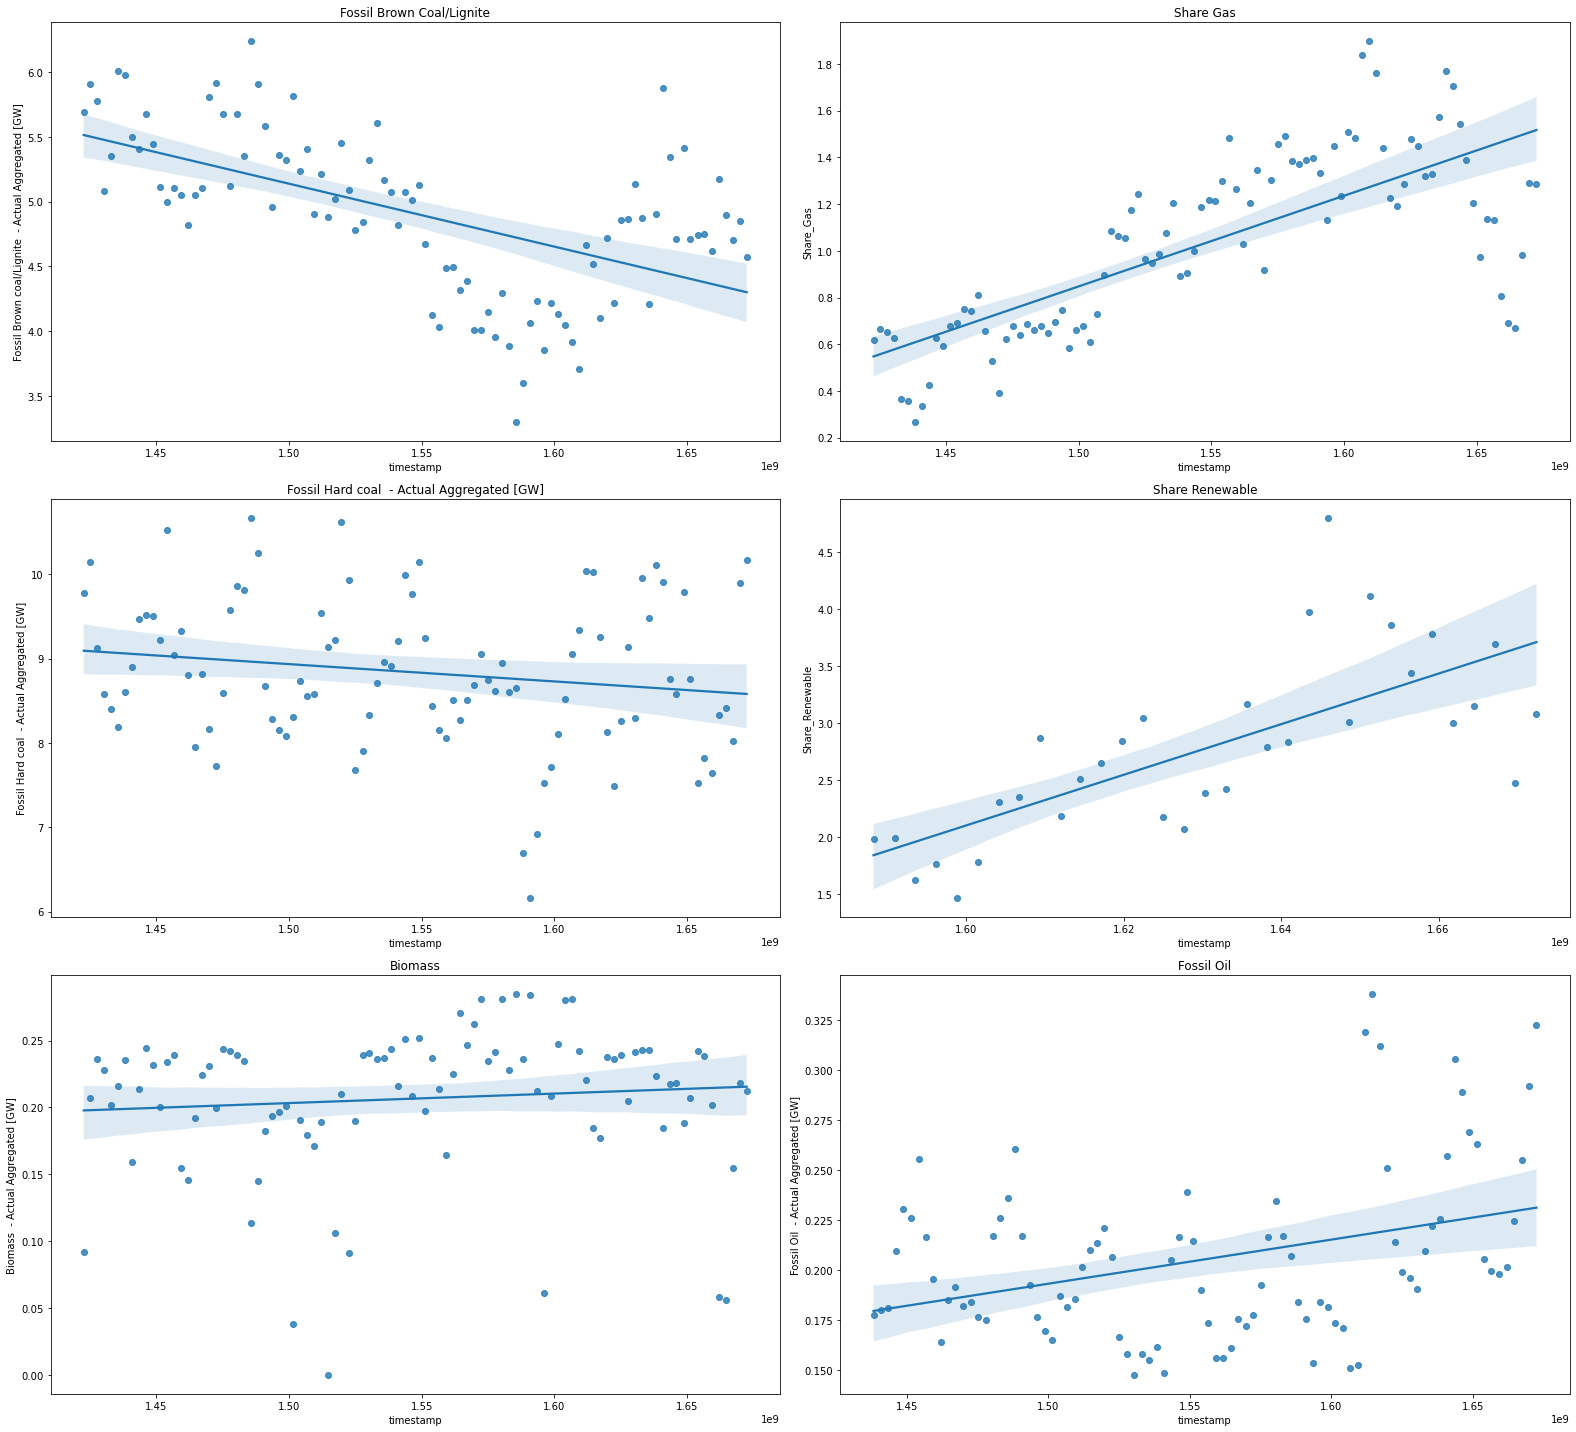

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(22, 20))

# Plotting for Fossil Brown Coal/Lignite
sns.regplot(x="timestamp", y="Fossil Brown coal/Lignite  - Actual Aggregated [GW]", data=monthly_data_new, ax=ax[0, 0])
ax[0, 0].set_title('Fossil Brown Coal/Lignite')

# Plotting for Fossil Gas
sns.regplot(x="timestamp", y="Share_Gas", data=monthly_data_new, ax=ax[0, 1])
ax[0, 1].set_title('Share Gas')

# Plotting for Fossil Hard coal
sns.regplot(x="timestamp", y="Fossil Hard coal  - Actual Aggregated [GW]", data=monthly_data_new, ax=ax[1, 0])
ax[1, 0].set_title('Fossil Hard coal  - Actual Aggregated [GW]')

# Plotting for Hydro Water Reservoir
sns.regplot(x="timestamp", y="Share_Renewable", data=monthly_data_new, ax=ax[1, 1])
ax[1, 1].set_title('Share Renewable')

# Plotting for Biomass
sns.regplot(x="timestamp", y="Biomass  - Actual Aggregated [GW]", data=monthly_data_new, ax=ax[2, 0])
ax[2, 0].set_title('Biomass')

# Plotting for Wind Onshore
sns.regplot(x="timestamp", y="Fossil Oil  - Actual Aggregated [GW]", data=monthly_data_new, ax=ax[2, 1])
ax[2, 1].set_title('Fossil Oil')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [67]:
monthly_data_CO2_new = monthly_data_CO2.copy()

monthly_data_CO2_new.reset_index(inplace=True)
monthly_data_CO2_new['timestamp'] = pd.to_datetime(monthly_data_CO2_new['StartTime']).astype('int64') / 10**9

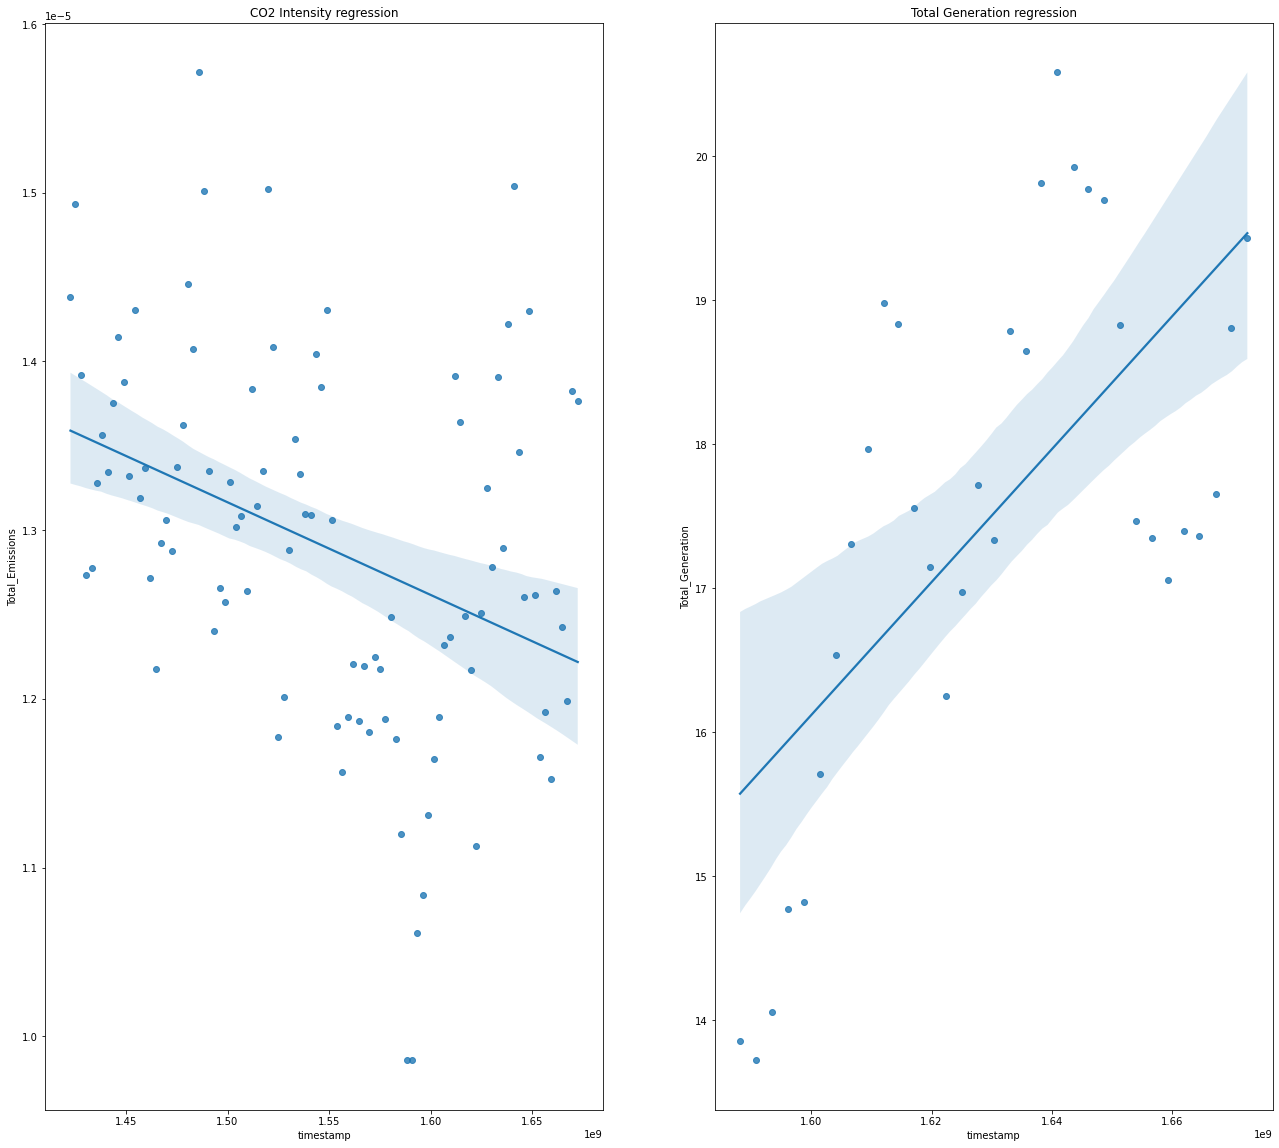

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(22, 20))

# Plotting for Fossil Brown Coal/Lignite
sns.regplot(x="timestamp", y="Total_Emissions", data=monthly_data_CO2_new, ax=ax[0])
ax[0].set_title('CO2 Intensity regression')

sns.regplot(x="timestamp", y="Total_Generation", data=monthly_data_new, ax=ax[1])
ax[1].set_title('Total Generation regression')

plt.show()

## 3. Predict the date when:
- the electricity in the grid is net CO2-neutral-
- the share of renewables is > 85%
-▪ the share of gas plants is < 0-%-
▪ all coal plants are phased-out

## The date when the electricity in the grid is net CO2-neutral

In [69]:
Co2_emission2015_2022_new = Co2_emission2015_2022.copy()

Co2_emission2015_2022_new.reset_index(inplace=True)
Co2_emission2015_2022_new['timestamp'] = pd.to_datetime(Co2_emission2015_2022_new['StartTime']).astype('int64') / 10**9

In [70]:
import statsmodels.formula.api as smf

# Run a regression model with x, y
results_CO2 = smf.ols("Total_Emissions ~ timestamp", data = Co2_emission2015_2022_new).fit()

# Save the estimated parameters
a,b = results_CO2.params

In [71]:
a,b

(2.132037293652695e-05, -5.4454497938499365e-15)

In [72]:
CO2_Intercept = results_CO2.params['Intercept']
CO2_Slope = results_CO2.params.iloc[1]

In [73]:
def x_pred(slope, intercept, y):
    x = (y - intercept)/slope
    return x

In [74]:
date_CO2 = pd.to_datetime(x_pred(CO2_Slope, CO2_Intercept, 0), unit='s')

In [75]:
print(f"Date when the electricity in the grid is net CO2-neutral is: {date_CO2}")

Date when the electricity in the grid is net CO2-neutral is: 2094-01-25 13:18:08.872150016


## Predict the date when the share of renewables is > 85%

In [76]:
df_gen_total = df_gen_new.copy()
df_gen_total["Total_Generation"] = df_gen_total["Fossil Brown coal/Lignite  - Actual Aggregated [GW]"]+df_gen_total["Fossil Hard coal  - Actual Aggregated [GW]"]+df_gen_total["Share_Gas"]+df_gen_total["Share_Renewable"]+df_gen_total["Fossil Oil  - Actual Aggregated [GW]"]
df_gen_total["Percentage_Renewables"] = (df_gen_total["Share_Renewable"]/df_gen_total["Total_Generation"])*100
df_gen_total["Percentage_Gas_Plants"] = (df_gen_total["Share_Gas"]/df_gen_total["Total_Generation"])*100
df_gen_total["Percentage_Coal_Plants"] = ((df_gen_total["Fossil Brown coal/Lignite  - Actual Aggregated [GW]"]+df_gen_total["Fossil Hard coal  - Actual Aggregated [GW]"])/df_gen_total["Total_Generation"])*100

In [77]:
df_gen_total.reset_index(inplace=True)
df_gen_total['timestamp'] = pd.to_datetime(df_gen_total['StartTime']).astype('int64') / 10**9

In [78]:
# Run a regression model with x, y
results_Renewables = smf.ols("Percentage_Renewables ~ timestamp", data = df_gen_total).fit()

# Save the estimated parameters
Renewables_Intercept, Renewables_Slope=results_Renewables.params

In [79]:
date_Renewables=pd.to_datetime(x_pred(Renewables_Slope, Renewables_Intercept, 86), unit='s')
print(f"Date when the share of renewables is > 85%: {date_Renewables}")

Date when the share of renewables is > 85%: 2046-07-17 17:06:47.445691392


In [80]:
ptg_num = 85

while ptg_num<=99:
    ptg_num+= 1
    date_Renewables=pd.to_datetime(x_pred(Renewables_Slope, Renewables_Intercept, ptg_num), unit='s')
    print(f"Date when the share of renewables is = {ptg_num}%: {date_Renewables}")

Date when the share of renewables is = 86%: 2046-07-17 17:06:47.445691392
Date when the share of renewables is = 87%: 2046-11-24 00:02:59.964374016
Date when the share of renewables is = 88%: 2047-04-02 06:59:12.483056640
Date when the share of renewables is = 89%: 2047-08-09 13:55:25.001739264
Date when the share of renewables is = 90%: 2047-12-16 20:51:37.520421376
Date when the share of renewables is = 91%: 2048-04-24 03:47:50.039104
Date when the share of renewables is = 92%: 2048-08-31 10:44:02.557786624
Date when the share of renewables is = 93%: 2049-01-07 17:40:15.076468736
Date when the share of renewables is = 94%: 2049-05-17 00:36:27.595151872
Date when the share of renewables is = 95%: 2049-09-23 07:32:40.113834496
Date when the share of renewables is = 96%: 2050-01-30 14:28:52.632516608
Date when the share of renewables is = 97%: 2050-06-08 21:25:05.151199232
Date when the share of renewables is = 98%: 2050-10-16 04:21:17.669881856
Date when the share of renewables is = 99

## Predict the date when the share of gas plants is < 10%

In [81]:
# Run a regression model with x, y
results_Gas = smf.ols("Percentage_Gas_Plants ~ timestamp", data = df_gen_total).fit()

# Save the estimated parameters
Gas_Intercept, Gas_Slope=results_Gas.params

In [82]:
perc_arr = np.arange(10)

for element in perc_arr:
    date_Gas=pd.to_datetime(x_pred(Gas_Slope, Gas_Intercept, element), unit='s')
    print(f"Date when the share of gas plants is = {element}%: {date_Gas}")

Date when the share of gas plants is = 0%: 2025-11-27 04:52:14.910686720
Date when the share of gas plants is = 1%: 2025-05-09 11:24:05.868894208
Date when the share of gas plants is = 2%: 2024-10-19 17:55:56.827101696
Date when the share of gas plants is = 3%: 2024-04-01 00:27:47.785309184
Date when the share of gas plants is = 4%: 2023-09-12 06:59:38.743516672
Date when the share of gas plants is = 5%: 2023-02-22 13:31:29.701724160
Date when the share of gas plants is = 6%: 2022-08-04 20:03:20.659931648
Date when the share of gas plants is = 7%: 2022-01-15 02:35:11.618139136
Date when the share of gas plants is = 8%: 2021-06-27 09:07:02.576346624
Date when the share of gas plants is = 9%: 2020-12-07 15:38:53.534554112


## Predict the date when all coal plants are phased-out

In [83]:
# Run a regression model with x, y
results_Coal = smf.ols("Percentage_Coal_Plants ~ timestamp", data = df_gen_total).fit()

# Save the estimated parameters
Coal_Intercept, Coal_Slope=results_Coal.params

In [84]:
date_Coal=pd.to_datetime(x_pred(Coal_Slope, Coal_Intercept, 0), unit='s')
print(f"Date when all coal plants are phased-out: {date_Coal}")

Date when all coal plants are phased-out: 2090-12-06 23:33:36.633467392


# Task 4

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## MLR Regression Model for the Day-Ahead-Price 
in different European Bidding Zones

1. Use the previous data sets for the
year 2022
2. Compare 5 different models of
different complexity by using e a 
systematic approach to identify
those features of highest relevance
3. Perform model evaluation using kfold Cross-Validation
4. Select the best-performing model, 
plot its residuals, evaluate the
goodness of fit, and describe the
final model, and the reason why it
was selected.

Procedure: 

-Create a dataframe

-Create a Heatmap for the Correlation

-Create 5 Models with different features 

-Analyze the 5 Models and Plot the best performing

In [86]:
df_gen_2022 = pd.read_csv('Actual Generation per Production Type_202201010000-202301010000.csv')
df_dayAhead_2022 = pd.read_csv('Day-ahead Prices_202201010000-202301010000.csv')
df_load_2022 = pd.read_csv('Total Load - Day Ahead _ Actual_202201010000-202301010000.csv')

In [87]:
df_gen_2022.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|PL,01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST),223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,n/e,...,175.0,0.0,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4256.0
1,BZN|PL,01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST),221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,n/e,...,176.0,0.0,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4244.0
2,BZN|PL,01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST),221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,n/e,...,199.0,0.0,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4071.0
3,BZN|PL,01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST),223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,n/e,...,216.0,0.0,n/e,n/e,n/e,n/e,0.0,n/e,n/e,3997.0
4,BZN|PL,01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST),225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,n/e,...,238.0,0.0,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4105.0


In [88]:
df_dayAhead_2022.columns

Index(['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]', 'Currency', 'BZN|PL'], dtype='object')

In [89]:
df_load_2022.head()

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|PL,Actual Total Load [MW] - BZN|PL
0,01.01.2022 00:00 - 01.01.2022 01:00,15450.0,14911.0
1,01.01.2022 01:00 - 01.01.2022 02:00,14750.0,14438.0
2,01.01.2022 02:00 - 01.01.2022 03:00,14100.0,13935.0
3,01.01.2022 03:00 - 01.01.2022 04:00,13700.0,13579.0
4,01.01.2022 04:00 - 01.01.2022 05:00,13450.0,13397.0


In [90]:
df_gen_2022['MTU'] = df_gen_2022['MTU'].str.strip()

# Split 'MTU' column and create 'Start_Time' and 'End_Time' columns
df_gen_2022[['StartTime', 'EndTime']] = df_gen_2022['MTU'].str.split('-', expand=True)

# Strip leading and trailing spaces
df_gen_2022['StartTime'] = df_gen_2022['StartTime'].str.strip()
df_gen_2022['EndTime'] = df_gen_2022['EndTime'].str.strip()

# Convert to datetime
df_gen_2022['StartTime'] = pd.to_datetime(df_gen_2022['StartTime'], format='%d.%m.%Y %H:%M', errors='coerce')
df_gen_2022['EndTime'] = pd.to_datetime(df_gen_2022['EndTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Rearrange columns
column_order = ['MTU', 'StartTime', 'EndTime'] + [col for col in df_gen_2022.columns if col not in ['MTU', 'StartTime', 'EndTime']]
df_gen_2022 = df_gen_2022[column_order]

# Set 'StartTime' as the index
df_gen_2022.set_index('StartTime', inplace=True)

df_dayAhead_2022['MTU (CET/CEST)'] = df_dayAhead_2022['MTU (CET/CEST)'].str.strip()

# Split 'MTU' column and create 'Start_Time' and 'End_Time' columns
df_dayAhead_2022[['StartTime', 'EndTime']] = df_dayAhead_2022['MTU (CET/CEST)'].str.split('-', expand=True)

# Strip leading and trailing spaces
df_dayAhead_2022['StartTime'] = df_dayAhead_2022['StartTime'].str.strip()
df_dayAhead_2022['EndTime'] = df_dayAhead_2022['EndTime'].str.strip()

# Convert to datetime
df_dayAhead_2022['StartTime'] = pd.to_datetime(df_dayAhead_2022['StartTime'], format='%d.%m.%Y %H:%M', errors='coerce')
df_dayAhead_2022['EndTime'] = pd.to_datetime(df_dayAhead_2022['EndTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Rearrange columns
column_order = ['MTU (CET/CEST)', 'StartTime', 'EndTime'] + [col for col in df_dayAhead_2022.columns if col not in ['MTU (CET/CEST)', 'StartTime', 'EndTime']]
df_dayAhead_2022 = df_dayAhead_2022[column_order]

# Set 'StartTime' as the index
df_dayAhead_2022.set_index('StartTime', inplace=True)

df_load_2022['Time (CET/CEST)'] = df_load_2022['Time (CET/CEST)'].str.strip()

# Split 'MTU' column and create 'Start_Time' and 'End_Time' columns
df_load_2022[['StartTime', 'EndTime']] = df_load_2022['Time (CET/CEST)'].str.split('-', expand=True)

# Strip leading and trailing spaces
df_load_2022['StartTime'] = df_load_2022['StartTime'].str.strip()
df_load_2022['EndTime'] = df_load_2022['EndTime'].str.strip()

# Convert to datetime
df_load_2022['StartTime'] = pd.to_datetime(df_load_2022['StartTime'], format='%d.%m.%Y %H:%M', errors='coerce')
df_load_2022['EndTime'] = pd.to_datetime(df_load_2022['EndTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Rearrange columns
column_order = ['Time (CET/CEST)', 'StartTime', 'EndTime'] + [col for col in df_load_2022.columns if col not in ['Time (CET/CEST)', 'StartTime', 'EndTime']]
df_load_2022 = df_load_2022[column_order]

In [91]:
# Set 'StartTime' as the index
df_load_2022.set_index('StartTime', inplace=True)

In [92]:
df_gen_2022["Day-ahead Price"] = df_dayAhead_2022["Day-ahead Price [EUR/MWh]"]
df_gen_2022["Day-ahead Total Load Forecast [MW]"] = df_load_2022["Day-ahead Total Load Forecast [MW] - BZN|PL"]

In [93]:
df_gen_2022

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],...,Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Day-ahead Price,Day-ahead Total Load Forecast [MW]
StartTime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST),NaT,BZN|PL,223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4256.0,59.03,15450.0
2022-01-01 01:00:00,01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST),NaT,BZN|PL,221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4244.0,49.37,14750.0
2022-01-01 02:00:00,01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST),NaT,BZN|PL,221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4071.0,43.22,14100.0
2022-01-01 03:00:00,01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST),NaT,BZN|PL,223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,3997.0,45.46,13700.0
2022-01-01 04:00:00,01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST),NaT,BZN|PL,225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4105.0,37.67,13450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),NaT,BZN|PL,251.0,2331.0,50.0,866.0,5478.0,318.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6828.0,87.43,19050.0
2022-12-31 20:00:00,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),NaT,BZN|PL,251.0,1734.0,49.0,824.0,5233.0,331.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6834.0,68.14,17950.0
2022-12-31 21:00:00,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),NaT,BZN|PL,252.0,1536.0,49.0,827.0,5264.0,316.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6484.0,41.55,16850.0


In [94]:
ne_columns = df_gen_2022.columns[df_gen_2022.eq('n/e').all()]

# Drop columns with only 'n/e' values
df_gen_2022 = df_gen_2022.drop(ne_columns, axis=1)
df_gen_2022

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],...,Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Day-ahead Price,Day-ahead Total Load Forecast [MW]
StartTime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST),NaT,BZN|PL,223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4256.0,59.03,15450.0
2022-01-01 01:00:00,01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST),NaT,BZN|PL,221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4244.0,49.37,14750.0
2022-01-01 02:00:00,01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST),NaT,BZN|PL,221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4071.0,43.22,14100.0
2022-01-01 03:00:00,01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST),NaT,BZN|PL,223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,3997.0,45.46,13700.0
2022-01-01 04:00:00,01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST),NaT,BZN|PL,225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4105.0,37.67,13450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),NaT,BZN|PL,251.0,2331.0,50.0,866.0,5478.0,318.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6828.0,87.43,19050.0
2022-12-31 20:00:00,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),NaT,BZN|PL,251.0,1734.0,49.0,824.0,5233.0,331.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6834.0,68.14,17950.0
2022-12-31 21:00:00,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),NaT,BZN|PL,252.0,1536.0,49.0,827.0,5264.0,316.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6484.0,41.55,16850.0


In [95]:
df_gen_2022=df_gen_2022.ffill()

In [96]:
df_gen_2022

,MTU,EndTime,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],...,Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Day-ahead Price,Day-ahead Total Load Forecast [MW]
StartTime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST),NaT,BZN|PL,223.0,2514.0,65.0,994.0,5686.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4256.0,59.03,15450.0
2022-01-01 01:00:00,01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST),NaT,BZN|PL,221.0,2422.0,64.0,996.0,5685.0,280.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4244.0,49.37,14750.0
2022-01-01 02:00:00,01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST),NaT,BZN|PL,221.0,2466.0,64.0,1003.0,5683.0,277.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4071.0,43.22,14100.0
2022-01-01 03:00:00,01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST),NaT,BZN|PL,223.0,2560.0,65.0,996.0,5704.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,3997.0,45.46,13700.0
2022-01-01 04:00:00,01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST),NaT,BZN|PL,225.0,2420.0,65.0,996.0,5621.0,276.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,4105.0,37.67,13450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,31.12.2022 19:00 - 31.12.2022 20:00 (CET/CEST),NaT,BZN|PL,251.0,2331.0,50.0,866.0,5478.0,318.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6828.0,87.43,19050.0
2022-12-31 20:00:00,31.12.2022 20:00 - 31.12.2022 21:00 (CET/CEST),NaT,BZN|PL,251.0,1734.0,49.0,824.0,5233.0,331.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6834.0,68.14,17950.0
2022-12-31 21:00:00,31.12.2022 21:00 - 31.12.2022 22:00 (CET/CEST),NaT,BZN|PL,252.0,1536.0,49.0,827.0,5264.0,316.0,n/e,...,n/e,n/e,n/e,n/e,0.0,n/e,n/e,6484.0,41.55,16850.0


In [97]:
df_gen_2022.columns

Index(['MTU', 'EndTime', 'Area', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore

# Correlation with Day ahead Price

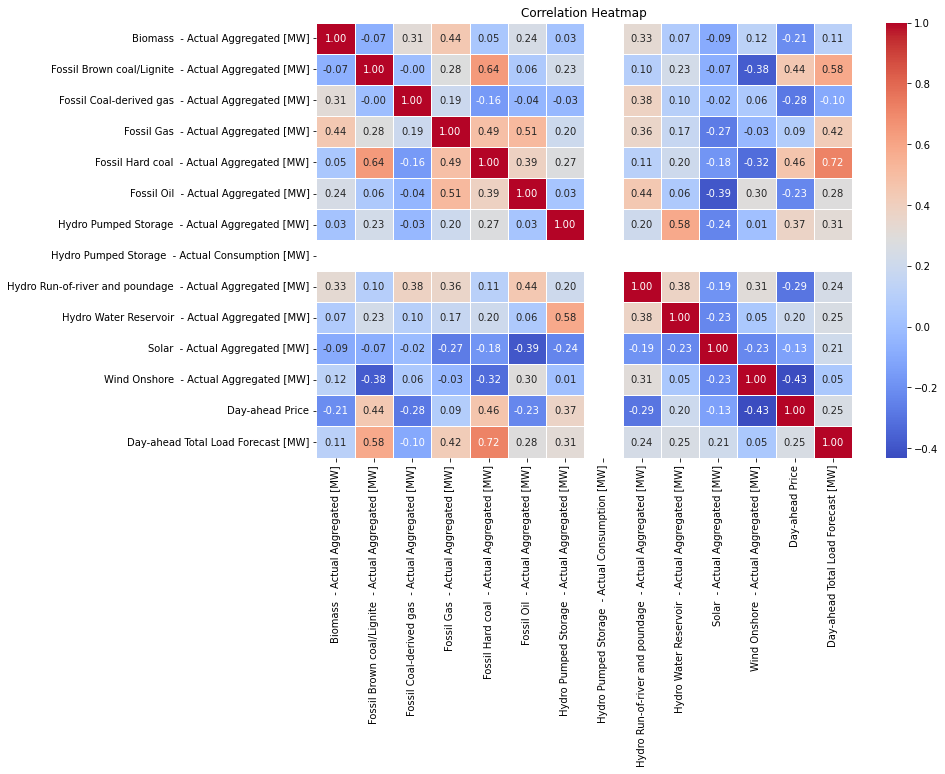

In [98]:
# Calculate Correlation Matrix:
numeric_columns = df_gen_2022.select_dtypes(include=['number']).columns
correlation_matrix = df_gen_2022[numeric_columns].corr()
# Identify Correlation with Dependent Variable:
correlation_matrix = df_gen_2022[numeric_columns].corr()

# Identify correlation with the dependent variable
correlation_with_price = correlation_matrix['Day-ahead Price'].abs()

# Sort and Select Top 5 Features:
top_5_features = correlation_with_price.sort_values(ascending=False).head(6).index[1:]

#Plot Correlation Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [99]:
#Print Top 5 Features:
print("Top 5 Features and Their Correlations with 'Day-ahead Price':")
for feature in top_5_features:
    correlation_coefficient = correlation_with_price[feature]
    print(f"{feature}: {correlation_coefficient:.4f}")
    

Top 5 Features and Their Correlations with 'Day-ahead Price':
Fossil Hard coal  - Actual Aggregated [MW]: 0.4633
Fossil Brown coal/Lignite  - Actual Aggregated [MW]: 0.4446
Wind Onshore  - Actual Aggregated [MW]: 0.4305
Hydro Pumped Storage  - Actual Aggregated [MW]: 0.3716
Hydro Run-of-river and poundage  - Actual Aggregated [MW]: 0.2950


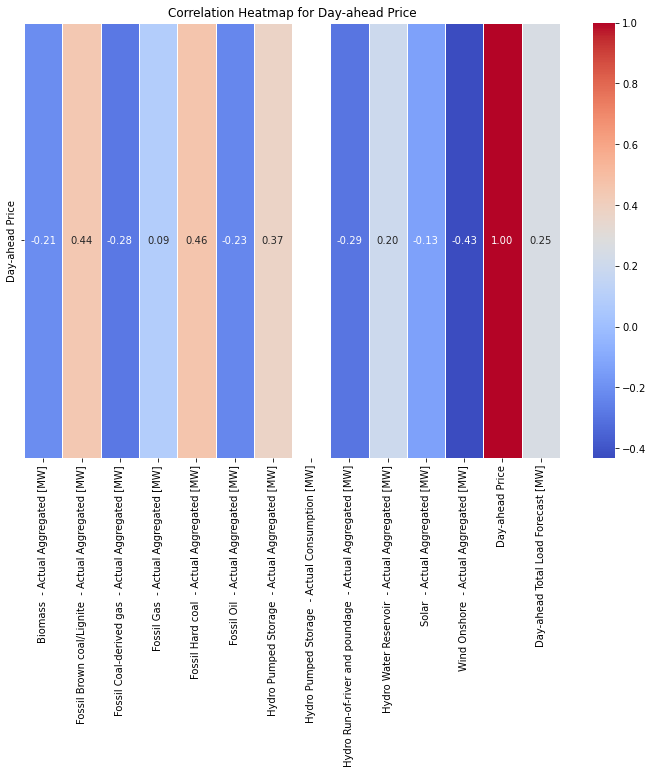

In [100]:
# Assuming your DataFrame is named df_gen_2022
correlation_matrix = df_gen_2022[numeric_columns].corr()

# Identify correlation with the dependent variable
correlation_with_price = correlation_matrix['Day-ahead Price'].abs()
correlation_with_price
# Select only the features correlated with 'Day-ahead Price'
correlation_matrix_price = correlation_matrix.loc[['Day-ahead Price'], correlation_with_price.index]

# Plot Correlation Heatmap for Day-ahead Price
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_price, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Day-ahead Price')
plt.show()


## MLR Model 1: Biggest fossil

In [101]:
# Run a regression model with x, y
results = smf.ols("Q('Day-ahead Price') ~Q('Fossil Hard coal  - Actual Aggregated [MW]')+Q('Fossil Brown coal/Lignite  - Actual Aggregated [MW]')", data = df_gen_2022).fit()

In [102]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Q('Day-ahead Price')   R-squared:                       0.252
Model:                              OLS   Adj. R-squared:                  0.252
Method:                   Least Squares   F-statistic:                     1475.
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                          00:31:49   Log-Likelihood:                -49501.
No. Observations:                  8761   AIC:                         9.901e+04
Df Residuals:                      8758   BIC:                         9.903e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## MLR Model 2 Biggest fossil + biggest renewables

In [103]:
    results1 = smf.ols("Q('Day-ahead Price') ~ Q('Wind Onshore  - Actual Aggregated [MW]') +Q('Fossil Hard coal  - Actual Aggregated [MW]')+Q('Fossil Brown coal/Lignite  - Actual Aggregated [MW]') +Q('Hydro Run-of-river and poundage  - Actual Aggregated [MW]')+Q('Hydro Run-of-river and poundage  - Actual Aggregated [MW]')+Q('Hydro Pumped Storage  - Actual Aggregated [MW]')", data = df_gen_2022).fit()

In [104]:
print(results1.summary())

                             OLS Regression Results                             
Dep. Variable:     Q('Day-ahead Price')   R-squared:                       0.498
Model:                              OLS   Adj. R-squared:                  0.498
Method:                   Least Squares   F-statistic:                     1739.
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                          00:31:49   Log-Likelihood:                -47751.
No. Observations:                  8761   AIC:                         9.551e+04
Df Residuals:                      8755   BIC:                         9.556e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## MLR Model 3: Only fossil

In [105]:
results2 = smf.ols("Q('Day-ahead Price') ~ Q('Fossil Brown coal/Lignite  - Actual Aggregated [MW]') + Q('Fossil Coal-derived gas  - Actual Aggregated [MW]') + Q('Fossil Gas  - Actual Aggregated [MW]') + Q('Fossil Hard coal  - Actual Aggregated [MW]') + Q('Fossil Oil  - Actual Aggregated [MW]')", data=df_gen_2022).fit()


In [106]:
print(results2.summary())

                             OLS Regression Results                             
Dep. Variable:     Q('Day-ahead Price')   R-squared:                       0.476
Model:                              OLS   Adj. R-squared:                  0.475
Method:                   Least Squares   F-statistic:                     1588.
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                          00:31:49   Log-Likelihood:                -47945.
No. Observations:                  8761   AIC:                         9.590e+04
Df Residuals:                      8755   BIC:                         9.594e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## MLR Model 4: Only renewables

In [107]:
results3 =  smf.ols("Q('Day-ahead Price') ~ Q('Biomass  - Actual Aggregated [MW]') +  Q('Hydro Pumped Storage  - Actual Aggregated [MW]') + Q('Hydro Run-of-river and poundage  - Actual Aggregated [MW]') + Q('Hydro Water Reservoir  - Actual Aggregated [MW]') + Q('Solar  - Actual Aggregated [MW]') + Q('Wind Onshore  - Actual Aggregated [MW]')", data=df_gen_2022).fit()

In [108]:
print(results3.summary())


                             OLS Regression Results                             
Dep. Variable:     Q('Day-ahead Price')   R-squared:                       0.437
Model:                              OLS   Adj. R-squared:                  0.436
Method:                   Least Squares   F-statistic:                     1131.
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                          00:31:50   Log-Likelihood:                -48259.
No. Observations:                  8761   AIC:                         9.653e+04
Df Residuals:                      8754   BIC:                         9.658e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## MLR Model 5: All

In [109]:
results4 = smf.ols("Q('Day-ahead Price') ~ Q('Day-ahead Total Load Forecast [MW]') + Q('Biomass  - Actual Aggregated [MW]') + Q('Fossil Brown coal/Lignite  - Actual Aggregated [MW]') + Q('Fossil Coal-derived gas  - Actual Aggregated [MW]') + Q('Fossil Gas  - Actual Aggregated [MW]') + Q('Fossil Hard coal  - Actual Aggregated [MW]') + Q('Fossil Oil  - Actual Aggregated [MW]') + Q('Hydro Pumped Storage  - Actual Aggregated [MW]') + Q('Hydro Run-of-river and poundage  - Actual Aggregated [MW]') + Q('Hydro Water Reservoir  - Actual Aggregated [MW]') + Q('Solar  - Actual Aggregated [MW]') + Q('Wind Onshore  - Actual Aggregated [MW]')", data=df_gen_2022).fit()

In [110]:
print(results4.summary())

                             OLS Regression Results                             
Dep. Variable:     Q('Day-ahead Price')   R-squared:                       0.594
Model:                              OLS   Adj. R-squared:                  0.594
Method:                   Least Squares   F-statistic:                     1067.
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                          00:31:50   Log-Likelihood:                -46822.
No. Observations:                  8761   AIC:                         9.367e+04
Df Residuals:                      8748   BIC:                         9.376e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Crossvalidation: Model 1

In [111]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

features = [
    'Fossil Hard coal  - Actual Aggregated [MW]',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]'
]

target_variable = 'Day-ahead Price'

# Create the design matrix X and target vector y
X = df_gen_2022[features]
y = df_gen_2022[target_variable]

# Specify the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = []
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Make predictions on the test set
    y_pred = model.predict(sm.add_constant(X_test))

    # Calculate mean squared error and R-squared, and store them in the lists
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Display the cross-validation scores
print(f'Cross-Validation Mean Squared Error for each fold: {cv_mse_scores}')
print(f'Mean Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}')

print(f'Cross-Validation R-squared for each fold: {cv_r2_scores}')
print(f'Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}')


Cross-Validation Mean Squared Error for each fold: [5437.482937044328, 4326.206576677219, 5439.397860659687, 4072.1915379817005, 4417.6541041929295]
Mean Cross-Validation Mean Squared Error: 4738.586603311172
Cross-Validation R-squared for each fold: [0.22461551211889663, 0.25460844473202193, 0.2497681026541575, 0.28190666817747057, 0.2489907231119819]
Mean Cross-Validation R-squared: 0.2519778901589057


### Crossvalidation: Model 2

In [112]:
features = [
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
    'Fossil Hard coal  - Actual Aggregated [MW]',
    'Hydro Pumped Storage  - Actual Aggregated [MW]',
    'Wind Onshore  - Actual Aggregated [MW]'
]

target_variable = 'Day-ahead Price'

# Create the design matrix X and target vector y
X = df_gen_2022[features]
y = df_gen_2022[target_variable]

# Specify the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = []
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Make predictions on the test set
    y_pred = model.predict(sm.add_constant(X_test))

    # Calculate mean squared error and R-squared, and store them in the lists
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Display the cross-validation scores
print(f'Cross-Validation Mean Squared Error for each fold: {cv_mse_scores}')
print(f'Mean Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}')

print(f'Cross-Validation R-squared for each fold: {cv_r2_scores}')
print(f'Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}')


Cross-Validation Mean Squared Error for each fold: [4352.899241738206, 3558.8365123479844, 4306.283107660753, 3418.5778750060495, 3532.8680556470986]
Mean Cross-Validation Mean Squared Error: 3833.892958480018
Cross-Validation R-squared for each fold: [0.37927703159140835, 0.38682385229024807, 0.4060535689557264, 0.39716539522731353, 0.39940596949542573]
Mean Cross-Validation R-squared: 0.39374516351202443


### Crossvalidation: Model 3

In [113]:
features = [
    
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
    'Fossil Coal-derived gas  - Actual Aggregated [MW]',
    'Fossil Gas  - Actual Aggregated [MW]',
    'Fossil Hard coal  - Actual Aggregated [MW]',
    'Fossil Oil  - Actual Aggregated [MW]'
    
]

target_variable = 'Day-ahead Price'

# Create the design matrix X and target vector y
X = df_gen_2022[features]
y = df_gen_2022[target_variable]

# Specify the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = []
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Make predictions on the test set
    y_pred = model.predict(sm.add_constant(X_test))

    # Calculate mean squared error and R-squared, and store them in the lists
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Display the cross-validation scores
print(f'Cross-Validation Mean Squared Error for each fold: {cv_mse_scores}')
print(f'Mean Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}')

print(f'Cross-Validation R-squared for each fold: {cv_r2_scores}')
print(f'Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}')

Cross-Validation Mean Squared Error for each fold: [3648.921805899943, 2993.405764113796, 3993.119527384569, 2896.97860554581, 3094.655166831811]
Mean Cross-Validation Mean Squared Error: 3325.4161739551855
Cross-Validation R-squared for each fold: [0.47966413898783467, 0.4842457616125555, 0.44924682545741657, 0.48914460440482244, 0.47390296201455895]
Mean Cross-Validation R-squared: 0.47524085849543757


### Crossvalidation: Model 4

In [114]:
features = [
    'Biomass  - Actual Aggregated [MW]',

    'Hydro Pumped Storage  - Actual Aggregated [MW]',
    'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
    'Hydro Water Reservoir  - Actual Aggregated [MW]',
    'Solar  - Actual Aggregated [MW]',
    'Wind Onshore  - Actual Aggregated [MW]'
    
]

target_variable = 'Day-ahead Price'

# Create the design matrix X and target vector y
X = df_gen_2022[features]
y = df_gen_2022[target_variable]

# Specify the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = []
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Make predictions on the test set
    y_pred = model.predict(sm.add_constant(X_test))

    # Calculate mean squared error and R-squared, and store them in the lists
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Display the cross-validation scores
print(f'Cross-Validation Mean Squared Error for each fold: {cv_mse_scores}')
print(f'Mean Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}')

print(f'Cross-Validation R-squared for each fold: {cv_r2_scores}')
print(f'Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}')

Cross-Validation Mean Squared Error for each fold: [3921.3691522824333, 3388.462430512568, 4049.1890615586744, 3291.000168852838, 3227.983809519152]
Mean Cross-Validation Mean Squared Error: 3575.600924545133
Cross-Validation R-squared for each fold: [0.4408131764017923, 0.41617876162844114, 0.44151340457438615, 0.41966254429885275, 0.45123684892117677]
Mean Cross-Validation R-squared: 0.43388094716492975


### Crossvalidation: Model 5

In [115]:
features = [
    'Biomass  - Actual Aggregated [MW]',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
    'Fossil Coal-derived gas  - Actual Aggregated [MW]',
    'Fossil Gas  - Actual Aggregated [MW]',
    'Fossil Hard coal  - Actual Aggregated [MW]',
    'Fossil Oil  - Actual Aggregated [MW]',
    'Hydro Pumped Storage  - Actual Aggregated [MW]',
    'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
    'Hydro Water Reservoir  - Actual Aggregated [MW]',
    'Solar  - Actual Aggregated [MW]',
    'Wind Onshore  - Actual Aggregated [MW]',
    'Day-ahead Total Load Forecast [MW]'
]

target_variable = 'Day-ahead Price'

# Create the design matrix X and target vector y
X = df_gen_2022[features]
y = df_gen_2022[target_variable]

# Specify the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = []
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Make predictions on the test set
    y_pred = model.predict(sm.add_constant(X_test))

    # Calculate mean squared error and R-squared, and store them in the lists
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Display the cross-validation scores
print(f'Cross-Validation Mean Squared Error for each fold: {cv_mse_scores}')
print(f'Mean Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}')

print(f'Cross-Validation R-squared for each fold: {cv_r2_scores}')
print(f'Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}')


Cross-Validation Mean Squared Error for each fold: [2826.6487464390716, 2368.892215345682, 3059.694978954715, 2275.8702871546125, 2377.0736941192986]
Mean Cross-Validation Mean Squared Error: 2581.635984402676
Cross-Validation R-squared for each fold: [0.5969201897176355, 0.591847448483395, 0.5779899120888448, 0.5986713144370527, 0.5958931247161989]
Mean Cross-Validation R-squared: 0.5922643978886254


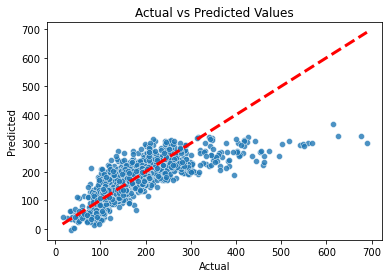

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Day-ahead Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     851.7
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:31:51   Log-Likelihood:                -37524.
No. Observations:                7009   AIC:                         7.507e+04
Df Residuals:                    6996   BIC:                         7.516e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [116]:
# Evaluate goodness of fit
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred,alpha=0.8, edgecolor='w', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3, color='r')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted Values')
plt.show()

# Describe the final model
print(f'Final Model Summary:\n{model.summary()}')

Model 5 is the best performing Model based on a high R-squared of 0.594 aswell as a low Mean Squared Error: 2581.635984402676.

Model 5 includes the featrues mentioned in the tabel above. 
Compared to the other models, model 5 has the highest number of features.

# Documentation in Appendix: 
Involvement per Task:

Julius Reiner: 

    Task 1: 90  %
    Task 2: 5   %
    Task 3: 10  %
    Task 4: 33  %
   
Mohammad AL Atailat: 

    Task 1: 5   %
    Task 2: 85  %
    Task 3: 10  %
    Task 4: 33  %
    
Saurav Bhowmick: 

    Task 1: 5   %
    Task 2: 10  %
    Task 3: 80  %
    Task 4: 33  %

Usage of ChatGPT: 

    -Visual imporvement of plots and code.
    -Arrange the code

Sources

    -Datacamp
    -cheatsheets
    -Code used in lectures with Prof. Pafferott
    -https://www.sciencedirect.com/science/article/pii/S2772783122000176 CO2 slides